## Install Library

In [1]:
!pip install pyspark
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=042d084ef670ee85760bf09d081c705694b11675a6a18f384349fe3ae576fda8
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publi

## Loading Library

In [2]:
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import stddev,countDistinct,count,avg,col
from pyspark.sql.functions import when
from pyspark.sql.functions import mean

from pyspark.sql.types import IntegerType
from sklearn.impute import SimpleImputer

## Read the folder we just processed

In [3]:
data_as_csv = pd.read_csv('processed_data.csv')

In [4]:
print(data_as_csv.head())

   Numar Data_deces/externare  Stare  Varsta     Sex  \
0      1       5/4/2012 19:28  alive      72  Female   
1      2       8/28/2012 2:39  alive      75    Male   
2      3      11/22/2011 9:03  alive      83    Male   
3      4       6/20/2012 6:15  alive      43    Male   
4      5       7/23/2011 2:41  alive      75    Male   

   Indice_de_masa_corporala  Data_internarii Hipertensiv Fibrilatie_atriala  \
0                 37.588179  4/26/2012 22:48          nu                 nu   
1                 30.188278   8/25/2012 7:29          nu                 nu   
2                 26.572634  10/30/2011 7:37          nu                 nu   
3                 83.264629  5/28/2012 15:25          nu                 nu   
4                 31.824842   7/3/2011 20:25          da                 nu   

  Boala_coronariana  ... Sodiu_din_sange Calciu_din_sange     Clorura  \
0                nu  ...      138.750000         7.463636  109.166667   
1                nu  ...      138.888889  

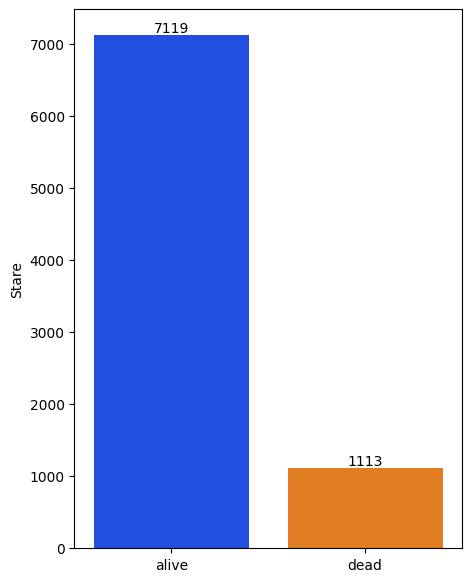

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Stare'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

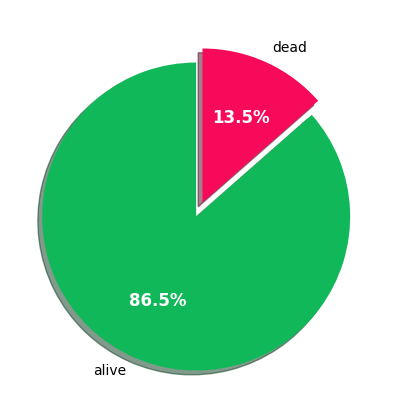

In [6]:
import matplotlib.pyplot as plt
data = data_as_csv['Stare'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['alive', 'dead'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

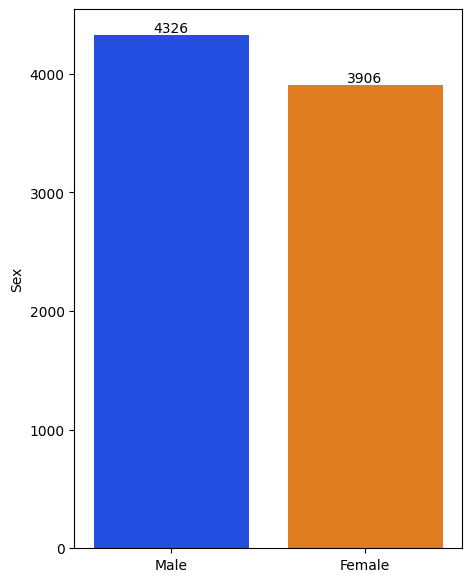

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Sex'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

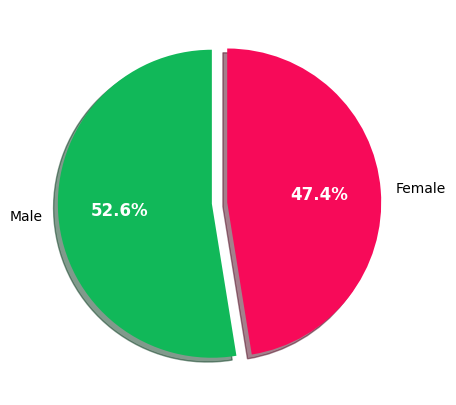

In [8]:
import matplotlib.pyplot as plt
data = data_as_csv['Sex'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['Male', 'Female'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

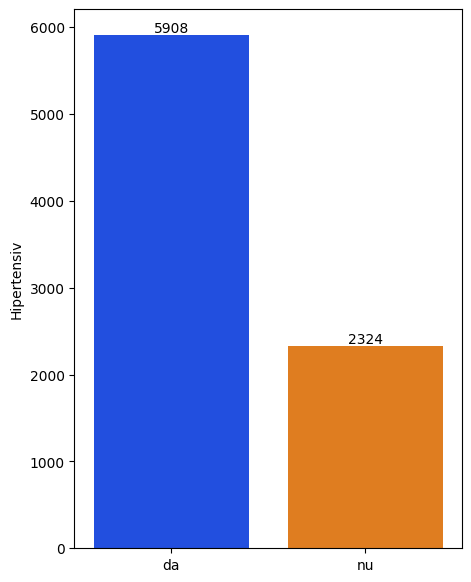

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Hipertensiv'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

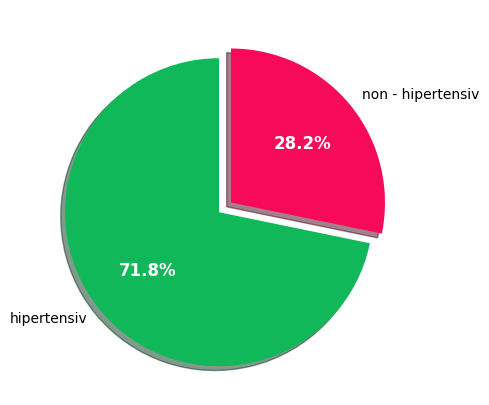

In [10]:
import matplotlib.pyplot as plt
data = data_as_csv['Hipertensiv'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['hipertensiv', 'non - hipertensiv'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

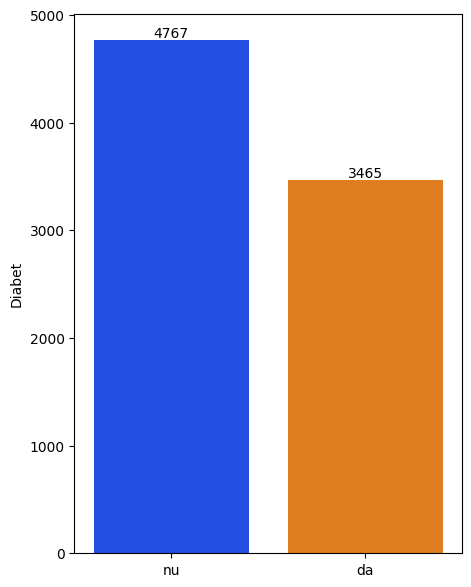

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Diabet'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

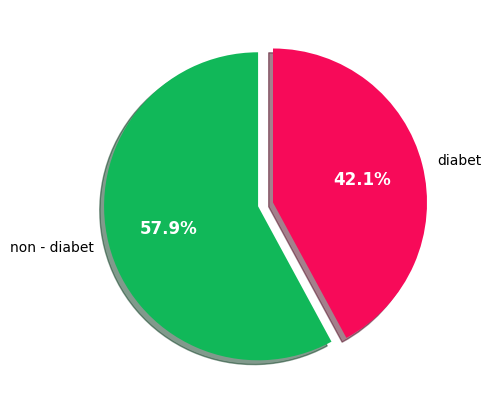

In [12]:
import matplotlib.pyplot as plt
data = data_as_csv['Diabet'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['non - diabet', 'diabet'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

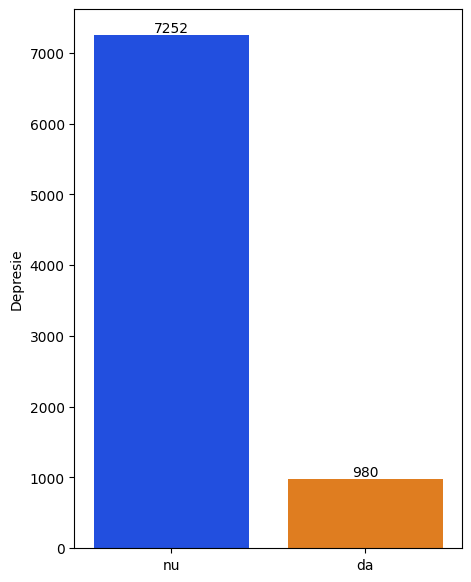

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Depresie'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

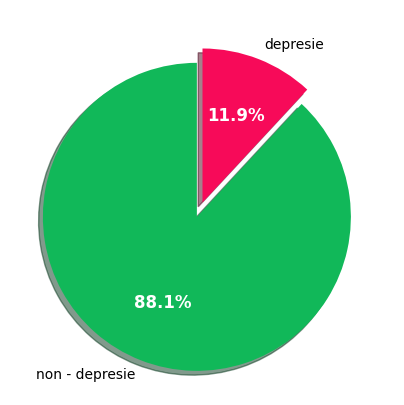

In [14]:
import matplotlib.pyplot as plt
data = data_as_csv['Depresie'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['non - depresie', 'depresie'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

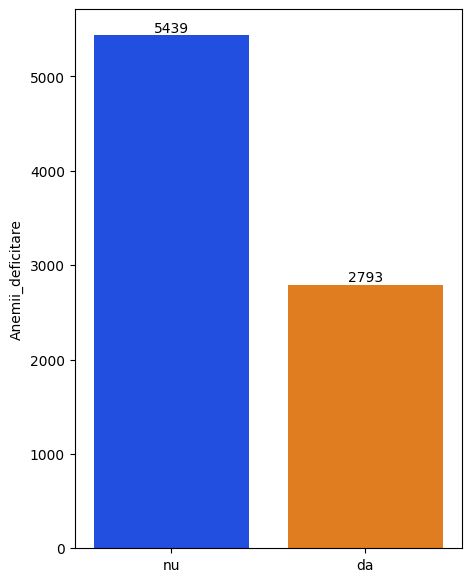

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Anemii_deficitare'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

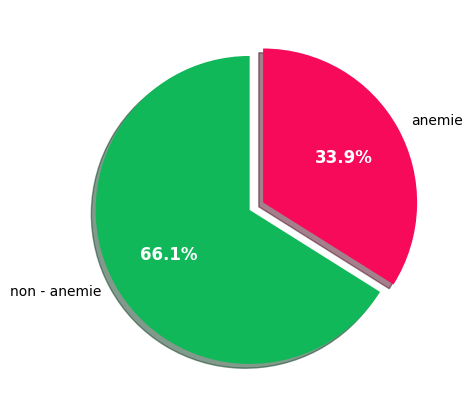

In [16]:
import matplotlib.pyplot as plt
data = data_as_csv['Anemii_deficitare'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['non - anemie', 'anemie'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

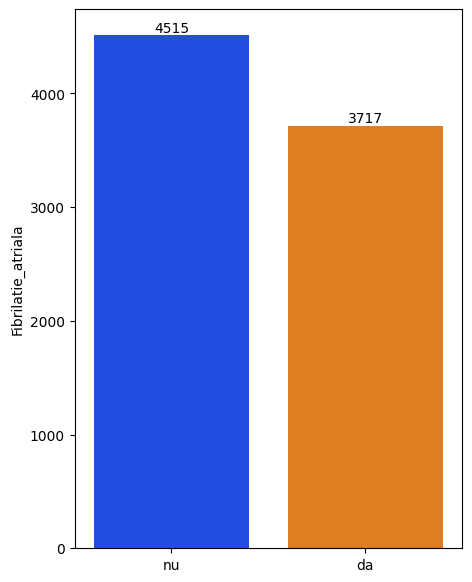

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Fibrilatie_atriala'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

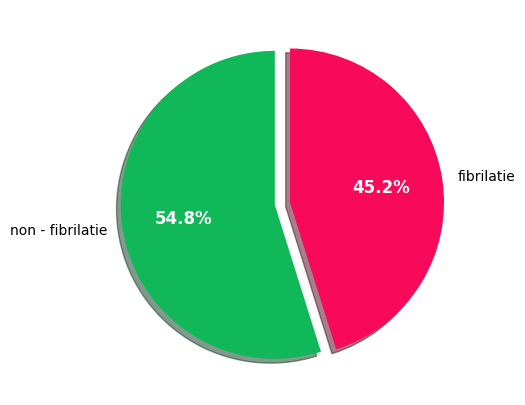

In [18]:
import matplotlib.pyplot as plt
data = data_as_csv['Fibrilatie_atriala'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['non - fibrilatie', 'fibrilatie'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

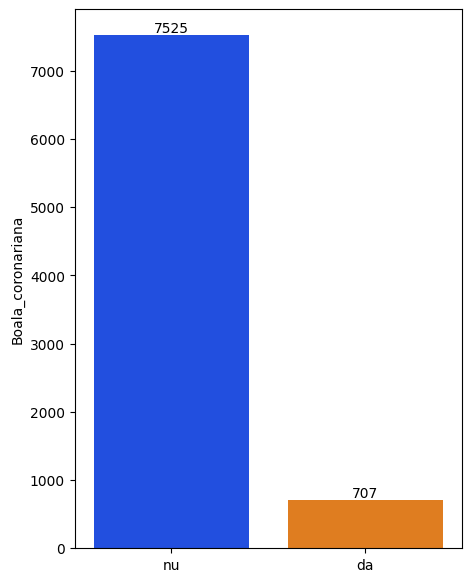

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Boala_coronariana'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

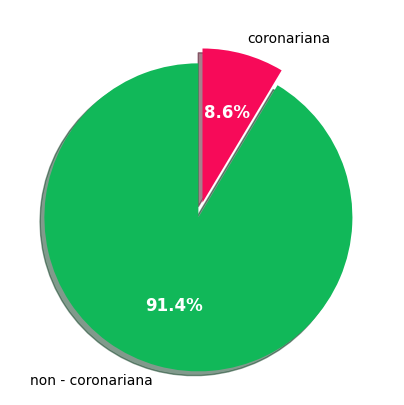

In [20]:
import matplotlib.pyplot as plt
data = data_as_csv['Boala_coronariana'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['non - coronariana', 'coronariana'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

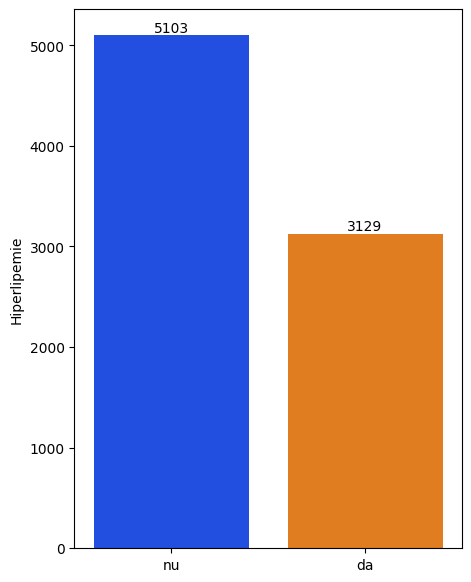

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Hiperlipemie'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

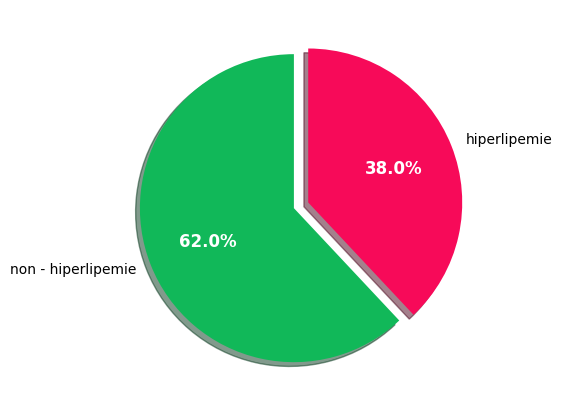

In [22]:
import matplotlib.pyplot as plt
data = data_as_csv['Hiperlipemie'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['non - hiperlipemie', 'hiperlipemie'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

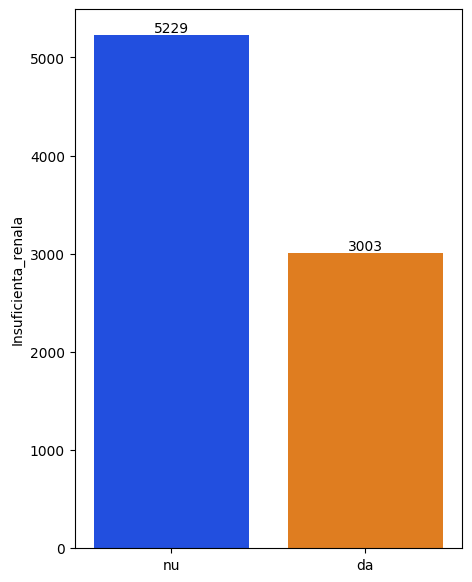

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Insuficienta_renala'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

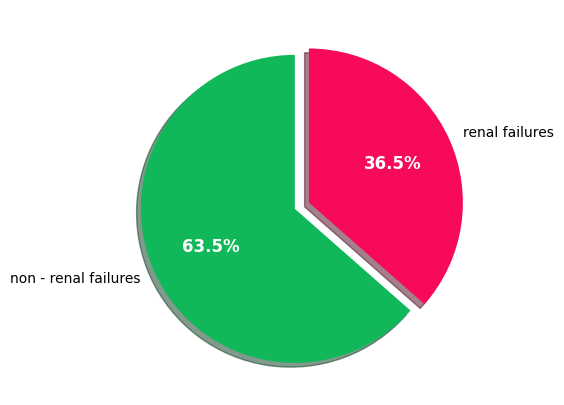

In [24]:
import matplotlib.pyplot as plt
data = data_as_csv['Insuficienta_renala'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['non - renal failures', 'renal failures'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

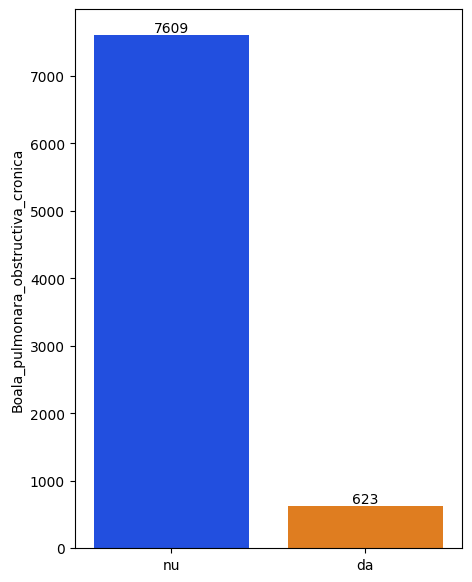

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 7))
data = data_as_csv['Boala_pulmonara_obstructiva_cronica'].value_counts()[0:2]
palette = 'bright' 
sns.barplot(x=data.index, y=data, palette=palette)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

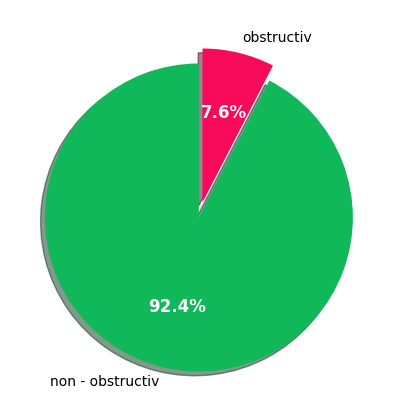

In [26]:
import matplotlib.pyplot as plt
data = data_as_csv['Boala_pulmonara_obstructiva_cronica'].value_counts()
colors = ['#11b859', '#f70a59']  
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
patches, texts, autotexts = ax.pie(data, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0), labels=['non - obstructiv', 'obstructiv'], colors=colors)
plt.setp(autotexts, size=12, color='white', weight='bold')
autotexts[1].set_color('white')
plt.show()

## Distributii data internare

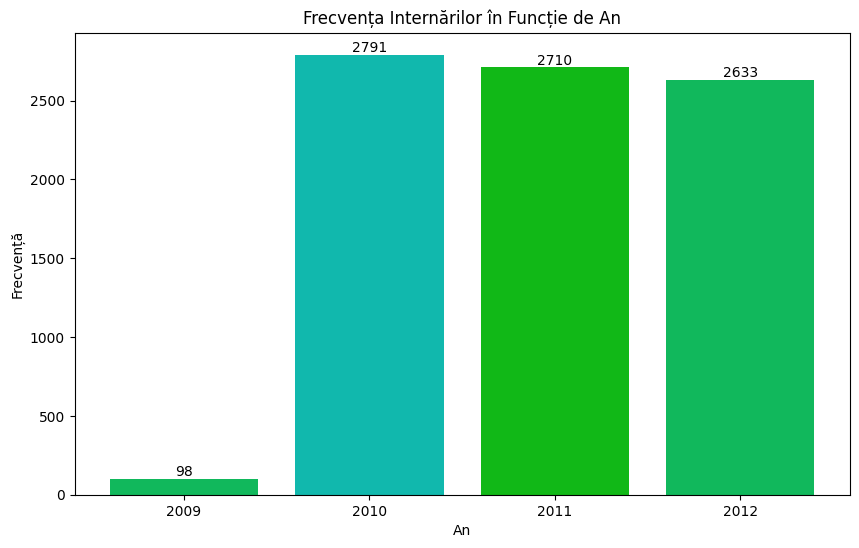

In [27]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_internarii'] = pd.to_datetime(data['Data_internarii'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_internarii'].dt.year
data['Luna'] = data['Data_internarii'].dt.month
data['Zi'] = data['Data_internarii'].dt.day

# Calculăm frecvența internărilor în funcție de an
frecventa_internarii = data['An'].value_counts().sort_index()
colors = ['#11b85c','#11b8ad', '#11b817', '#11b85c']

# Creăm un bar plot pentru frecvența internărilor în funcție de an
plt.figure(figsize=(10, 6))
bars = plt.bar(frecventa_internarii.index, frecventa_internarii.values)
plt.bar(frecventa_internarii.index, frecventa_internarii.values,color=colors)

# Personalizăm titlul și etichetele
plt.title('Frecvența Internărilor în Funcție de An')
plt.xlabel('An')
plt.ylabel('Frecvență')

# Afișăm doar valorile esențiale pe axa x
plt.xticks(frecventa_internarii.index[::1])  # Modificați pasul în funcție de necesități

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Afișăm plotul
plt.show()

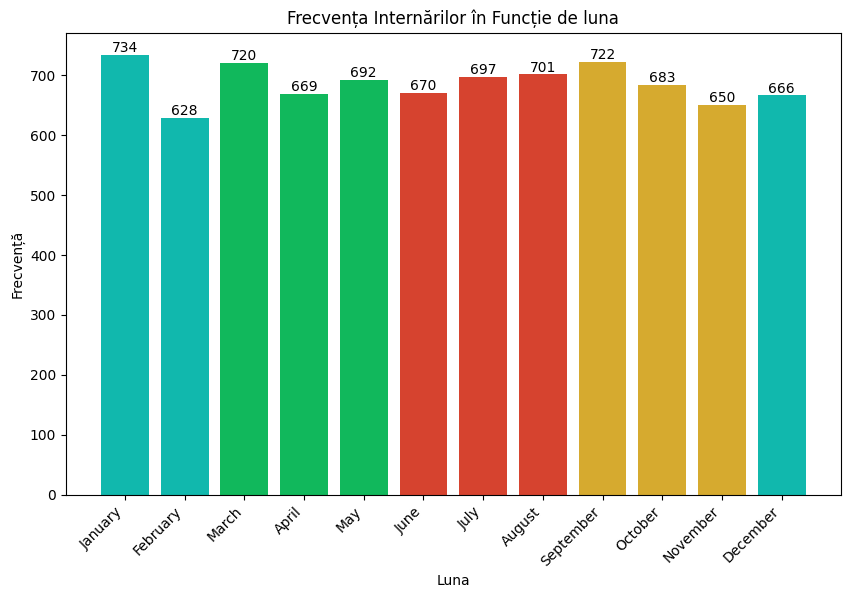

In [28]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_internarii'] = pd.to_datetime(data['Data_internarii'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_internarii'].dt.year
data['Luna'] = data['Data_internarii'].dt.month
data['Zi'] = data['Data_internarii'].dt.day

# Calculăm frecvența internărilor în funcție de an
frecventa_internarii = data['Luna'].value_counts().sort_index()
colors = ['#11b8ad','#11b8ad', '#11b85c', '#11b85c','#11b85c', '#d6432f', '#d6432f','#d6432f', '#d6aa2f', '#d6aa2f','#d6aa2f', '#11b8ad']

nume_luni = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

# Creăm un bar plot pentru frecvența internărilor în funcție de an
plt.figure(figsize=(10, 6))
bars = plt.bar(frecventa_internarii.index, frecventa_internarii.values)
plt.bar(frecventa_internarii.index, frecventa_internarii.values,color=colors)

# Personalizăm titlul și etichetele
plt.title('Frecvența Internărilor în Funcție de luna')
plt.xlabel('Luna')
plt.ylabel('Frecvență')


# Afișăm doar numele lunilor pe axa x
plt.xticks(frecventa_internarii.index, nume_luni)

# Afișăm doar valorile esențiale pe axa x
plt.xticks(frecventa_internarii.index[::1])  # Modificați pasul în funcție de necesități
plt.gca().set_xticklabels(nume_luni, rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Afișăm plotul
plt.show()

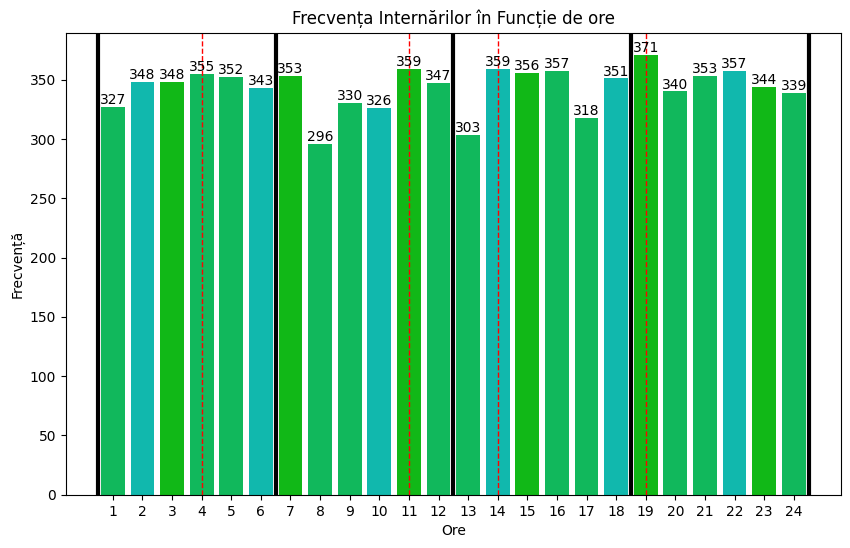

In [29]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_internarii'] = pd.to_datetime(data['Data_internarii'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_internarii'].dt.year
data['Luna'] = data['Data_internarii'].dt.month
data['Zi'] = data['Data_internarii'].dt.day

from datetime import datetime

# Convertirea coloanei în format datetime
data['Ora'] = pd.to_datetime(data_as_csv['Data_internarii'], format='%H:%M')

# Funcție pentru conversia în formatul "hh:mm AM/PM"
def convert_to_ampm(time):
    return datetime.strftime(time, '%I:%M %p')

# Aplicarea funcției pe coloana 'Timp'
data['Ora'] = data['Ora'].apply(convert_to_ampm)

# Convertim coloana cu ore în formatul dorit
data['Ora'] = pd.to_datetime(data['Ora']).dt.strftime('%H:%M')
data['Ora'] = data['Ora'].apply(lambda x: x.split(':')[0] + ':00' if int(x.split(':')[1]) <= 30 else x.split(':')[0] + ':00')

# Calculăm frecvența internărilor în funcție de an
frecventa_internarii = data['Ora'].value_counts().sort_index()
colors = ['#11b85c','#11b8ad', '#11b817', '#11b85c']
nume_luni = ['1', '2', '3', '4', '5', '6','7','8', '9', '10', '11','12','13', '14', '15', '16', '17', '18','19','20', '21', '22', '23','24']

# Creăm un bar plot pentru frecvența internărilor în funcție de an
plt.figure(figsize=(10, 6))
bars = plt.bar(frecventa_internarii.index, frecventa_internarii.values)
plt.bar(frecventa_internarii.index, frecventa_internarii.values,color=colors)

# Personalizăm titlul și etichetele
plt.title('Frecvența Internărilor în Funcție de ore')
plt.xlabel('Ore')
plt.ylabel('Frecvență')

# Afișăm doar valorile esențiale pe axa x
plt.xticks(frecventa_internarii.index[::1])  # Modificați pasul în funcție de necesități
plt.gca().set_xticklabels(nume_luni, rotation=0, ha='center')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Adăugăm linii paralele pe baza valorilor specifice
plt.axvline(x=-0.5, color='black', linestyle='-', linewidth=3)
plt.axvline(x=11.5, color='black', linestyle='-', linewidth=3)
plt.axvline(x=5.5, color='black', linestyle='-', linewidth=3)
plt.axvline(x=17.5, color='black', linestyle='-', linewidth=3)
plt.axvline(x=23.5, color='black', linestyle='-', linewidth=3)

plt.axvline(x=3, color='red', linestyle='--', linewidth=1)
plt.axvline(x=10, color='red', linestyle='--', linewidth=1)
plt.axvline(x=13, color='red', linestyle='--', linewidth=1)
plt.axvline(x=18, color='red', linestyle='--', linewidth=1)
# Afișăm plotul
plt.show()


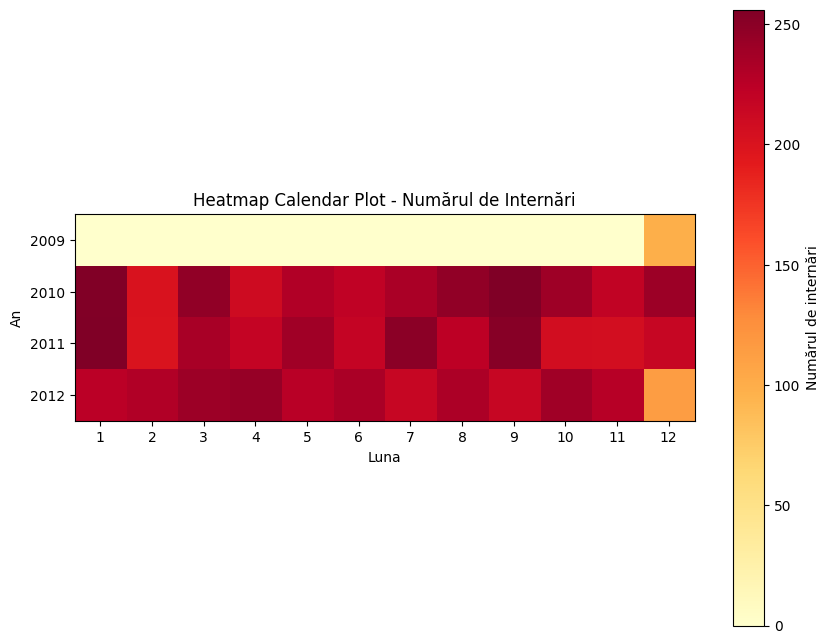

In [30]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_internarii'] = pd.to_datetime(data['Data_internarii'])

# Extrageți anul, luna și ziua din coloana de date
data['An'] = data['Data_internarii'].dt.year
data['Luna'] = data['Data_internarii'].dt.month
data['Zi'] = data['Data_internarii'].dt.day

# Creați o nouă coloană cu valoarea 1 pentru a reprezenta internarea
data['Internare'] = 1

# Creați un DataFrame pivotat pe baza anului, lunii și zilei
heatmap_data = data.pivot_table(index='An', columns='Luna', values='Internare', aggfunc='sum', fill_value=0)

# Convertirea dataframe-ului într-un array numpy
heatmap_array = np.array(heatmap_data)

# Crearea heatmap calendar plot
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_array, cmap='YlOrRd')

# Adăugarea legendei
cbar = plt.colorbar()
cbar.set_label('Numărul de internări')

# Personalizarea titlului și etichetelor
plt.title('Heatmap Calendar Plot - Numărul de Internări')
plt.xlabel('Luna')
plt.ylabel('An')

# Setăm etichetele pe axa y cu valorile anilor
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

# Setăm etichetele pe axa y cu valorile anilor
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)

# Afișarea plotului
plt.show()

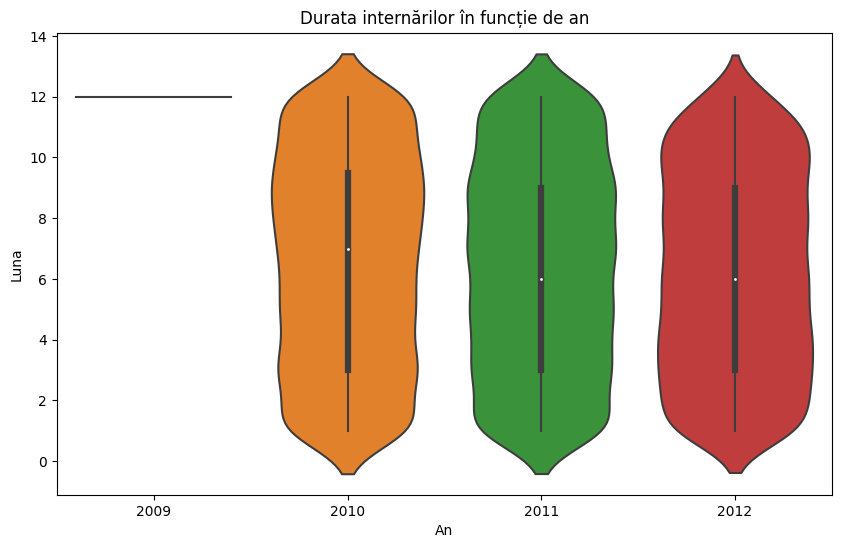

In [31]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_internarii'] = pd.to_datetime(data['Data_internarii'])

data['An'] = data['Data_internarii'].dt.year
data['Luna'] = data['Data_internarii'].dt.month

# Creăm violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['An'], y=data['Luna'])

# Personalizăm titlul și etichetele
plt.title('Durata internărilor în funcție de an')
plt.xlabel('An')
plt.ylabel('Luna')

# Afișăm plotul
plt.show()

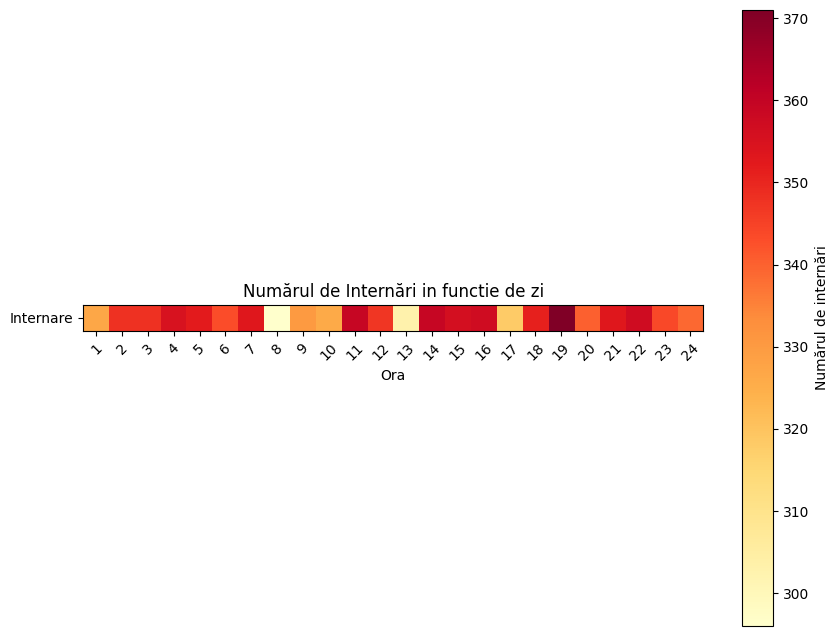

In [32]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_internarii'] = pd.to_datetime(data['Data_internarii'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_internarii'].dt.year
data['Luna'] = data['Data_internarii'].dt.month
data['Zi'] = data['Data_internarii'].dt.day

from datetime import datetime

# Convertirea coloanei în format datetime
data['Ora'] = pd.to_datetime(data_as_csv['Data_internarii'], format='%H:%M')

# Funcție pentru conversia în formatul "hh:mm AM/PM"
def convert_to_ampm(time):
    return datetime.strftime(time, '%I:%M %p')

# Aplicarea funcției pe coloana 'Timp'
data['Ora'] = data['Ora'].apply(convert_to_ampm)
nume_luni = ['1', '2', '3', '4', '5', '6','7','8', '9', '10', '11','12','13', '14', '15', '16', '17', '18','19','20', '21', '22', '23','24']
# Convertim coloana cu ore în formatul dorit
data['Ora'] = pd.to_datetime(data['Ora']).dt.strftime('%H:%M')
data['Ora'] = data['Ora'].apply(lambda x: x.split(':')[0] + ':00' if int(x.split(':')[1]) <= 30 else x.split(':')[0] + ':00')

# Creați un DataFrame pivotat pe baza anului, lunii și zilei
heatmap_data = data.pivot_table(columns='Ora', values='Internare', aggfunc='sum', fill_value=0)

# Convertirea dataframe-ului într-un array numpy
heatmap_array = np.array(heatmap_data)

# Crearea heatmap calendar plot
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_array, cmap='YlOrRd')

# Adăugarea legendei
cbar = plt.colorbar()
cbar.set_label('Numărul de internări')

# Personalizarea titlului și etichetelor
plt.title('Numărul de Internări in functie de zi')
plt.xlabel('Ora')


# Setăm etichetele pe axa y cu valorile anilor
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

# Setăm etichetele pe axa y cu valorile anilor
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.gca().set_xticklabels(nume_luni, rotation=45, ha='center')
# Afișarea plotului
plt.show()

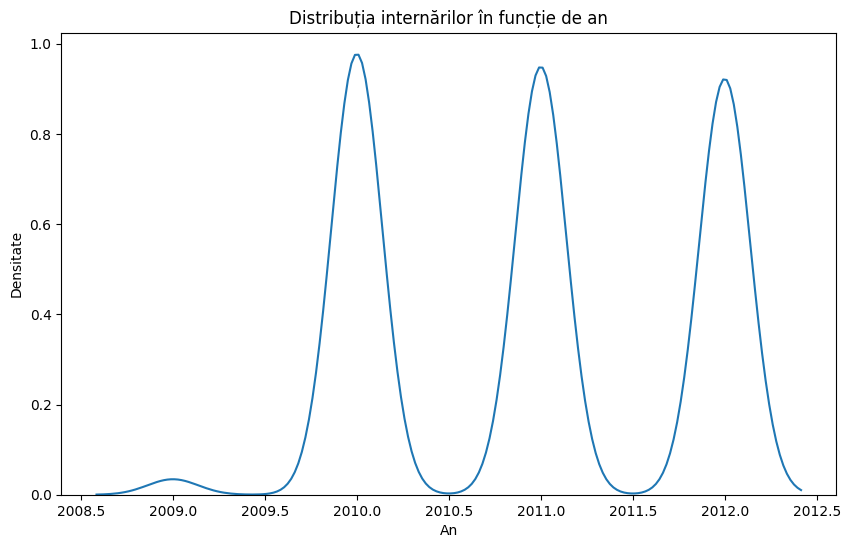

In [33]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_internarii'] = pd.to_datetime(data['Data_internarii'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_internarii'].dt.year
data['Luna'] = data['Data_internarii'].dt.month
data['Zi'] = data['Data_internarii'].dt.day

# Creăm kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='An')

# Personalizăm titlul și etichetele
plt.title('Distribuția internărilor în funcție de an')
plt.xlabel('An')
plt.ylabel('Densitate')

# Afișăm plotul
plt.show()


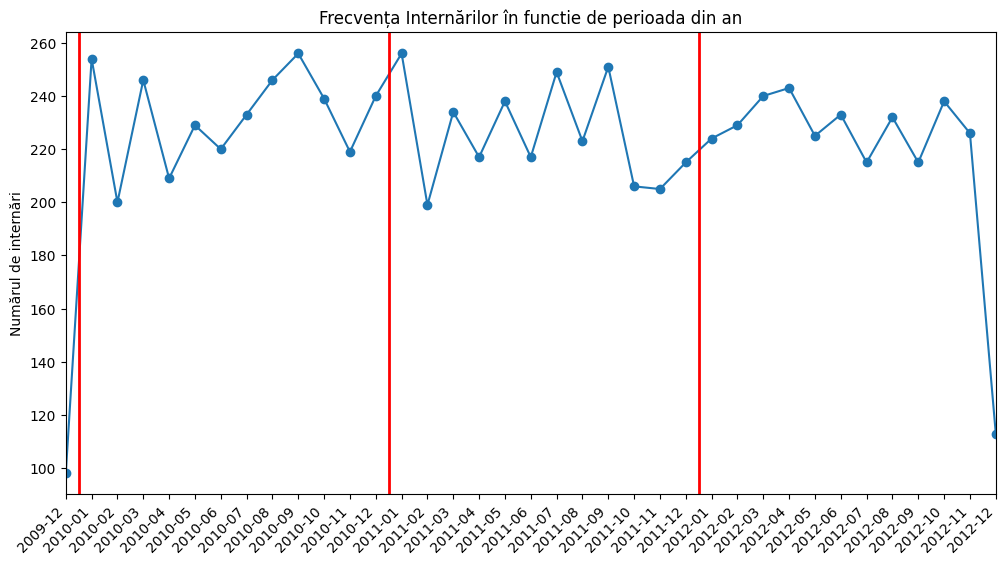

In [34]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
dat = data_as_csv

dat['Data_internarii'] = pd.to_datetime(dat['Data_internarii'])
dat['Data_internarii'] = dat['Data_internarii'].dt.strftime('%Y-%m')

# Calculăm frecvența internărilor în funcție de an și lună
frecventa_internari = dat['Data_internarii'].value_counts().sort_index()

# Creăm un line plot pentru frecvența internărilor
plt.figure(figsize=(12, 6))  # Redimensionăm figura

# Trasăm linia pentru frecvența internărilor
plt.plot(frecventa_internari.index, frecventa_internari.values, marker='o')

# Personalizăm titlul și etichetele
plt.title('Frecvența Internărilor în functie de perioada din an')
#plt.xlabel('An și Lună')
plt.ylabel('Numărul de internări')

# Setăm limitele și etichetele pe axa x
plt.xlim(frecventa_internari.index[1], frecventa_internari.index[-1])
plt.xticks(frecventa_internari.index, rotation=45, ha='right')

plt.axvline(x=0.5, color='red', linestyle='-', linewidth=2)
plt.axvline(x=12.5, color='red', linestyle='-', linewidth=2)
plt.axvline(x=24.5, color='red', linestyle='-', linewidth=2)
# Afișăm plotul
plt.show()

## Distributii data deces/externare

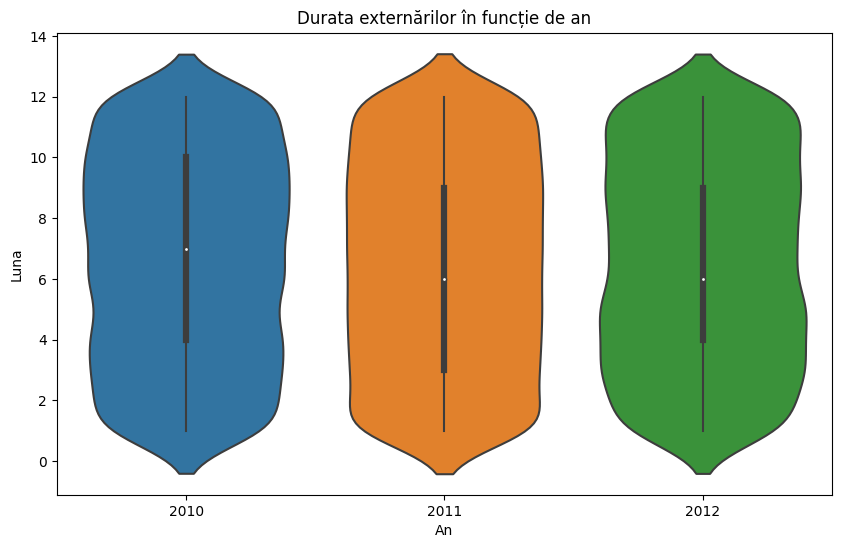

In [35]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_deces/externare'] = pd.to_datetime(data['Data_deces/externare'])

data['An'] = data['Data_deces/externare'].dt.year
data['Luna'] = data['Data_deces/externare'].dt.month

# Creăm violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['An'], y=data['Luna'])

# Personalizăm titlul și etichetele
plt.title('Durata externărilor în funcție de an')
plt.xlabel('An')
plt.ylabel('Luna')

# Afișăm plotul
plt.show()

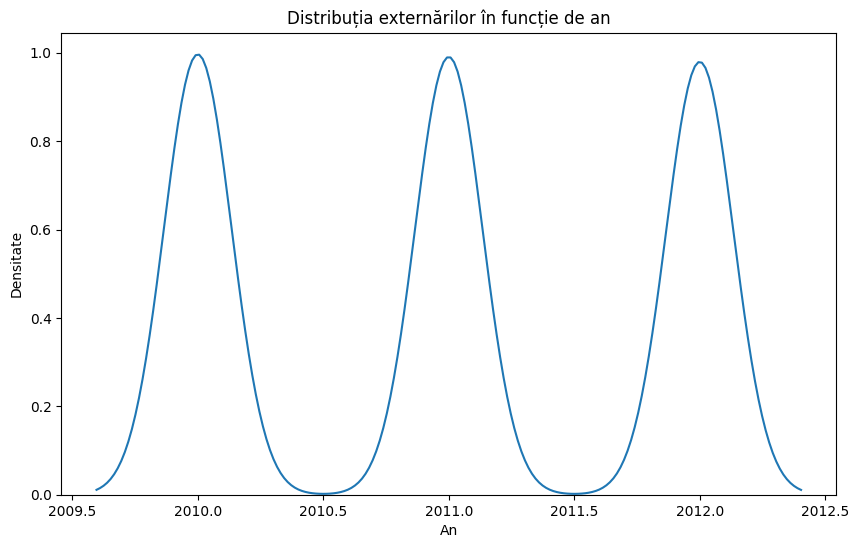

In [36]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_deces/externare'] = pd.to_datetime(data['Data_deces/externare'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_deces/externare'].dt.year
data['Luna'] = data['Data_deces/externare'].dt.month
data['Zi'] = data['Data_deces/externare'].dt.day

# Creăm kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='An')

# Personalizăm titlul și etichetele
plt.title('Distribuția externărilor în funcție de an')
plt.xlabel('An')
plt.ylabel('Densitate')

# Afișăm plotul
plt.show()


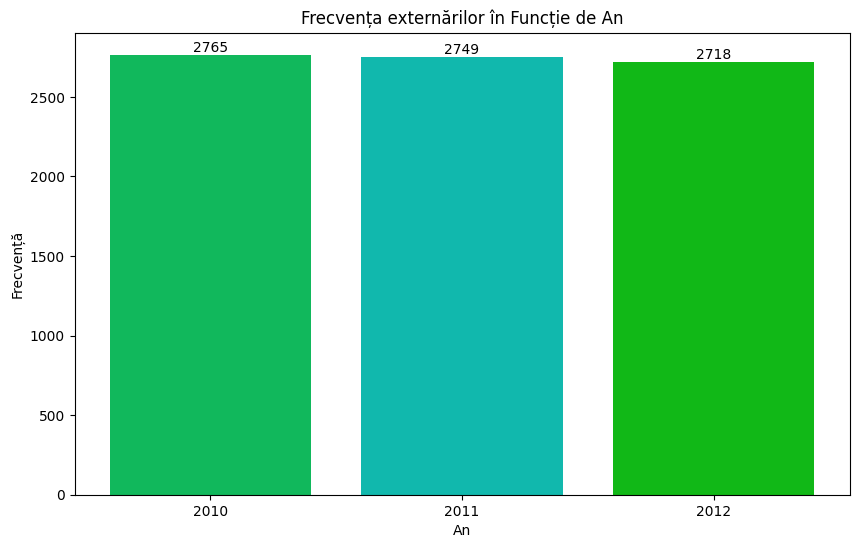

In [37]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_deces/externare'] = pd.to_datetime(data['Data_deces/externare'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_deces/externare'].dt.year
data['Luna'] = data['Data_deces/externare'].dt.month
data['Zi'] = data['Data_deces/externare'].dt.day

# Calculăm frecvența internărilor în funcție de an
frecventa_internarii = data['An'].value_counts().sort_index()
colors = ['#11b85c','#11b8ad', '#11b817', '#11b85c']

# Creăm un bar plot pentru frecvența internărilor în funcție de an
plt.figure(figsize=(10, 6))
bars = plt.bar(frecventa_internarii.index, frecventa_internarii.values)
plt.bar(frecventa_internarii.index, frecventa_internarii.values,color=colors)

# Personalizăm titlul și etichetele
plt.title('Frecvența externărilor în Funcție de An')
plt.xlabel('An')
plt.ylabel('Frecvență')

# Afișăm doar valorile esențiale pe axa x
plt.xticks(frecventa_internarii.index[::1])  # Modificați pasul în funcție de necesități

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Afișăm plotul
plt.show()

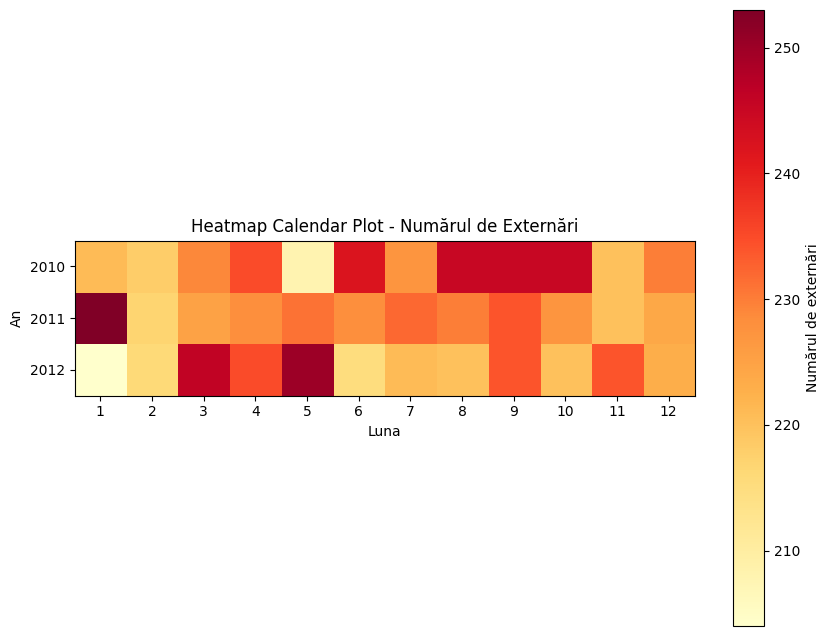

In [38]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_deces/externare'] = pd.to_datetime(data['Data_deces/externare'])

# Extrageți anul, luna și ziua din coloana de date
data['An'] = data['Data_deces/externare'].dt.year
data['Luna'] = data['Data_deces/externare'].dt.month
data['Zi'] = data['Data_deces/externare'].dt.day

# Creați o nouă coloană cu valoarea 1 pentru a reprezenta internarea
data['Externare'] = 1

# Creați un DataFrame pivotat pe baza anului, lunii și zilei
heatmap_data = data.pivot_table(index='An', columns='Luna', values='Externare', aggfunc='sum', fill_value=0)

# Convertirea dataframe-ului într-un array numpy
heatmap_array = np.array(heatmap_data)

# Crearea heatmap calendar plot
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_array, cmap='YlOrRd')

# Adăugarea legendei
cbar = plt.colorbar()
cbar.set_label('Numărul de externări')

# Personalizarea titlului și etichetelor
plt.title('Heatmap Calendar Plot - Numărul de Externări')
plt.xlabel('Luna')
plt.ylabel('An')

# Setăm etichetele pe axa y cu valorile anilor
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

# Setăm etichetele pe axa y cu valorile anilor
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)

# Afișarea plotului
plt.show()

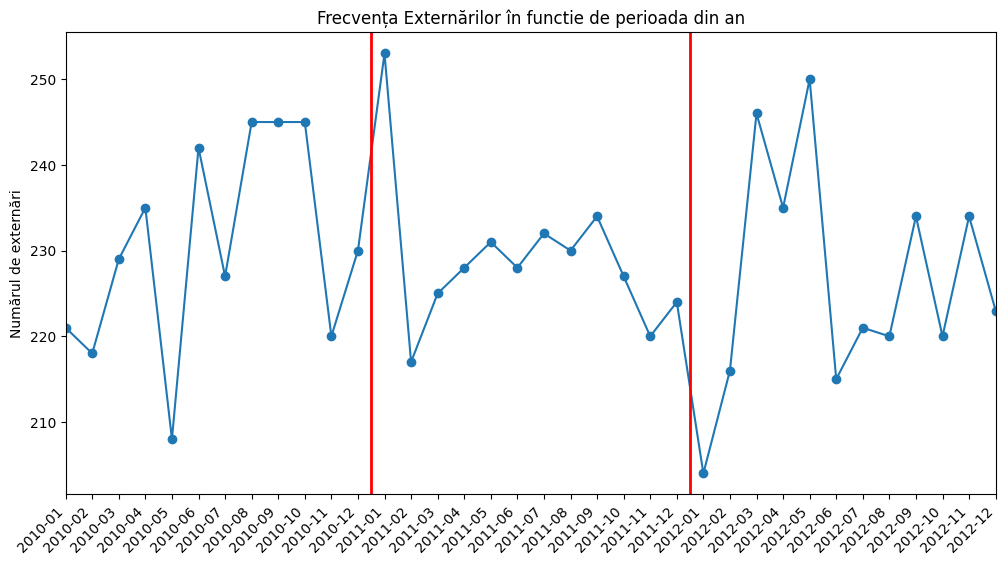

In [39]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
dat = data_as_csv

dat['Data_deces/externare'] = pd.to_datetime(dat['Data_deces/externare'])
dat['Data_deces/externare'] = dat['Data_deces/externare'].dt.strftime('%Y-%m')

# Calculăm frecvența internărilor în funcție de an și lună
frecventa_internari = dat['Data_deces/externare'].value_counts().sort_index()

# Creăm un line plot pentru frecvența internărilor
plt.figure(figsize=(12, 6))  # Redimensionăm figura

# Trasăm linia pentru frecvența internărilor
plt.plot(frecventa_internari.index, frecventa_internari.values, marker='o')

# Personalizăm titlul și etichetele
plt.title('Frecvența Externărilor în functie de perioada din an')
#plt.xlabel('An și Lună')
plt.ylabel('Numărul de externări')

# Setăm limitele și etichetele pe axa x
plt.xlim(frecventa_internari.index[1], frecventa_internari.index[-1])
plt.xticks(frecventa_internari.index, rotation=45, ha='right')

plt.axvline(x=11.5, color='red', linestyle='-', linewidth=2)
plt.axvline(x=23.5, color='red', linestyle='-', linewidth=2)

# Afișăm plotul
plt.show()

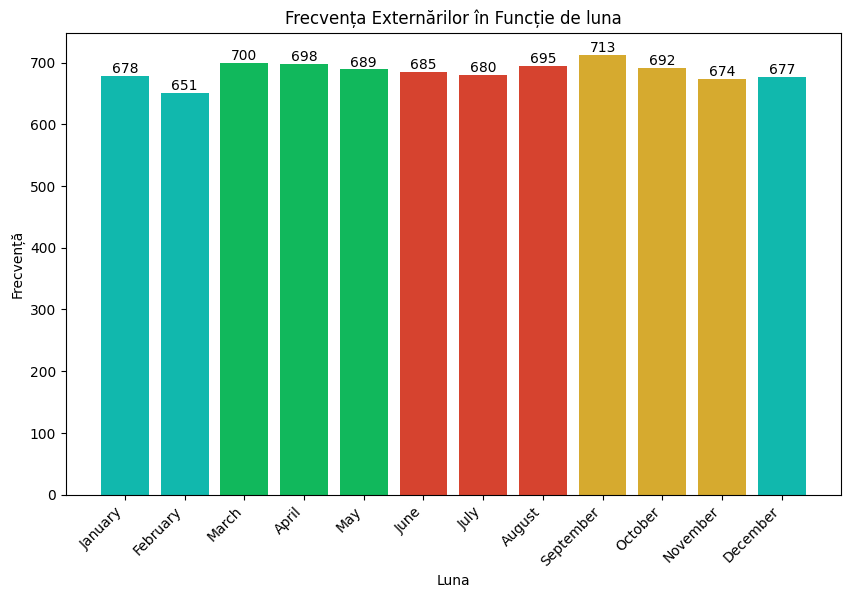

In [40]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_deces/externare'] = pd.to_datetime(data['Data_deces/externare'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_deces/externare'].dt.year
data['Luna'] = data['Data_deces/externare'].dt.month
data['Zi'] = data['Data_deces/externare'].dt.day

# Calculăm frecvența internărilor în funcție de an
frecventa_internarii = data['Luna'].value_counts().sort_index()
colors = ['#11b8ad','#11b8ad', '#11b85c', '#11b85c','#11b85c', '#d6432f', '#d6432f','#d6432f', '#d6aa2f', '#d6aa2f','#d6aa2f', '#11b8ad']

nume_luni = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

# Creăm un bar plot pentru frecvența internărilor în funcție de an
plt.figure(figsize=(10, 6))
bars = plt.bar(frecventa_internarii.index, frecventa_internarii.values)
plt.bar(frecventa_internarii.index, frecventa_internarii.values,color=colors)

# Personalizăm titlul și etichetele
plt.title('Frecvența Externărilor în Funcție de luna')
plt.xlabel('Luna')
plt.ylabel('Frecvență')


# Afișăm doar numele lunilor pe axa x
plt.xticks(frecventa_internarii.index, nume_luni)

# Afișăm doar valorile esențiale pe axa x
plt.xticks(frecventa_internarii.index[::1])  # Modificați pasul în funcție de necesități
plt.gca().set_xticklabels(nume_luni, rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Afișăm plotul
plt.show()

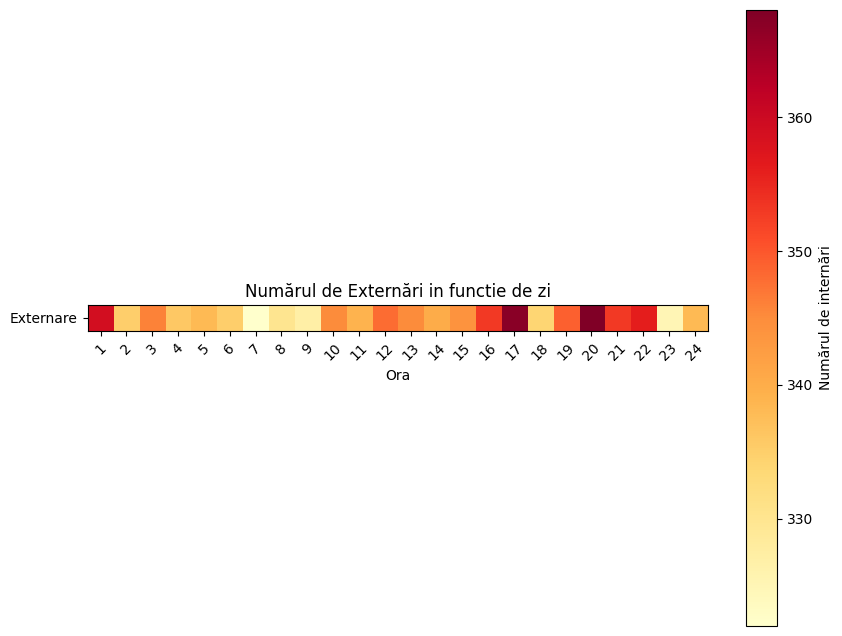

In [41]:
from datetime import datetime

data_as_csv = pd.read_csv('processed_data.csv')

# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv


# Convertirea coloanei în format datetime
data['Data_deces/externare'] = pd.to_datetime(data['Data_deces/externare'])

data['Ora'] = pd.to_datetime(data['Data_deces/externare'],format='%H:%M')



# Funcție pentru conversia în formatul "hh:mm AM/PM"
def convert_to_ampm(time):
    return datetime.strftime(time, '%I:%M %p')

# Aplicarea funcției pe coloana 'Timp'
data['Ora'] = data['Ora'].apply(convert_to_ampm)
nume_luni = ['1', '2', '3', '4', '5', '6','7','8', '9', '10', '11','12','13', '14', '15', '16', '17', '18','19','20', '21', '22', '23','24']

# Convertim coloana cu ore în formatul dorit
data['Ora'] = pd.to_datetime(data['Ora']).dt.strftime('%H:%M')
data['Ora'] = data['Ora'].apply(lambda x: x.split(':')[0] + ':00' if int(x.split(':')[1]) <= 30 else x.split(':')[0] + ':00')

data['Externare'] = 1

# Creați un DataFrame pivotat pe baza anului, lunii și zilei
heatmap_data = data.pivot_table(columns='Ora', values='Externare', aggfunc='sum', fill_value=0)

# Convertirea dataframe-ului într-un array numpy
heatmap_array = np.array(heatmap_data)

# Crearea heatmap calendar plot
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_array, cmap='YlOrRd')

# Adăugarea legendei
cbar = plt.colorbar()
cbar.set_label('Numărul de internări')

# Personalizarea titlului și etichetelor
plt.title('Numărul de Externări in functie de zi')
plt.xlabel('Ora')


# Setăm etichetele pe axa y cu valorile anilor
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

# Setăm etichetele pe axa y cu valorile anilor
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.gca().set_xticklabels(nume_luni, rotation=45, ha='center')
# Afișarea plotului
plt.show()

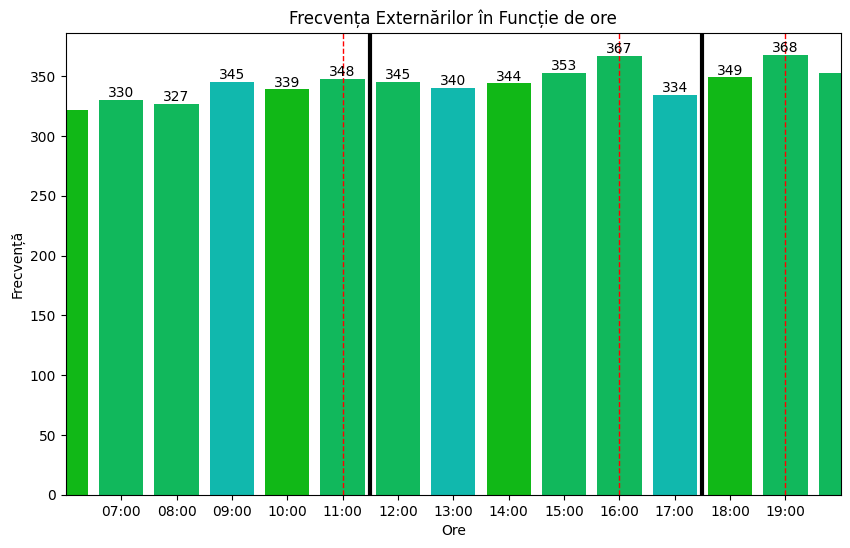

In [42]:
# Realizam o copie a setului de date pentru a nu afecta urmatoarele
data = data_as_csv

# Convertirea coloanei cu date în format de tip datetime
data['Data_deces/externare'] = pd.to_datetime(data['Data_deces/externare'])

# Extragem anul, luna și ziua din coloana de date
data['An'] = data['Data_deces/externare'].dt.year
data['Luna'] = data['Data_deces/externare'].dt.month
data['Zi'] = data['Data_deces/externare'].dt.day

from datetime import datetime

# Convertirea coloanei în format datetime
data['Ora'] = pd.to_datetime(data_as_csv['Data_deces/externare'], format='%H:%M')

# Funcție pentru conversia în formatul "hh:mm AM/PM"
def convert_to_ampm(time):
    return datetime.strftime(time, '%I:%M %p')

# Aplicarea funcției pe coloana 'Timp'
data['Ora'] = data['Ora'].apply(convert_to_ampm)

# Convertim coloana cu ore în formatul dorit
data['Ora'] = pd.to_datetime(data['Ora']).dt.strftime('%H:%M')
data['Ora'] = data['Ora'].apply(lambda x: x.split(':')[0] + ':00' if int(x.split(':')[1]) <= 30 else x.split(':')[0] + ':00')

# Calculăm frecvența internărilor în funcție de an
frecventa_internarii = data['Ora'].value_counts().sort_index()
colors = ['#11b85c','#11b8ad', '#11b817', '#11b85c']
nume_luni = ['1', '2', '3', '4', '5', '6','7','8', '9', '10', '11','12','13', '14', '15', '16', '17', '18','19','20', '21', '22', '23','24']

# Creăm un bar plot pentru frecvența internărilor în funcție de an
plt.figure(figsize=(10, 6))
bars = plt.bar(frecventa_internarii.index, frecventa_internarii.values)
plt.bar(frecventa_internarii.index, frecventa_internarii.values,color=colors)

# Personalizăm titlul și etichetele
plt.title('Frecvența Externărilor în Funcție de ore')
plt.xlabel('Ore')
plt.ylabel('Frecvență')

plt.xlim(6, 20)
plt.xticks(range(7, 20))  # Modifică aceste valori dacă dorești un alt pas sau valori diferite


# Afișăm doar valorile esențiale pe axa x
#plt.xticks(frecventa_internarii.index[::1])  # Modificați pasul în funcție de necesități
#plt.gca().set_xticklabels(nume_luni, rotation=0, ha='center')

for i, bar in enumerate(bars):
    height = bar.get_height()
    if i >= 7 and i <= 19:
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Adăugăm linii paralele pe baza valorilor specifice
plt.axvline(x=-0.5, color='black', linestyle='-', linewidth=3)
plt.axvline(x=11.5, color='black', linestyle='-', linewidth=3)
plt.axvline(x=5.5, color='black', linestyle='-', linewidth=3)
plt.axvline(x=17.5, color='black', linestyle='-', linewidth=3)
plt.axvline(x=23.5, color='black', linestyle='-', linewidth=3)

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axvline(x=11, color='red', linestyle='--', linewidth=1)
plt.axvline(x=16, color='red', linestyle='--', linewidth=1)
plt.axvline(x=19, color='red', linestyle='--', linewidth=1)
# Afișăm plotul
plt.show()


## Distributie variabile numerice

## Varsta

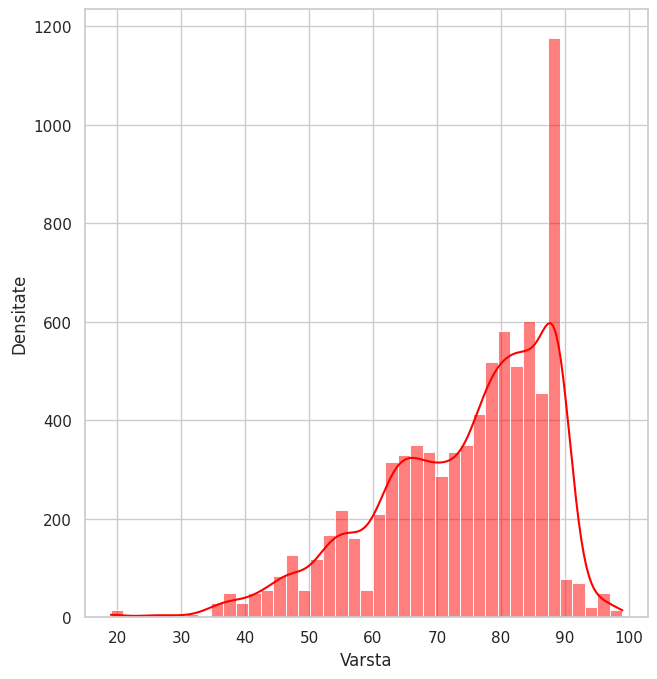

In [108]:
cat_cols = ['Varsta']
cat_colour = 'red'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

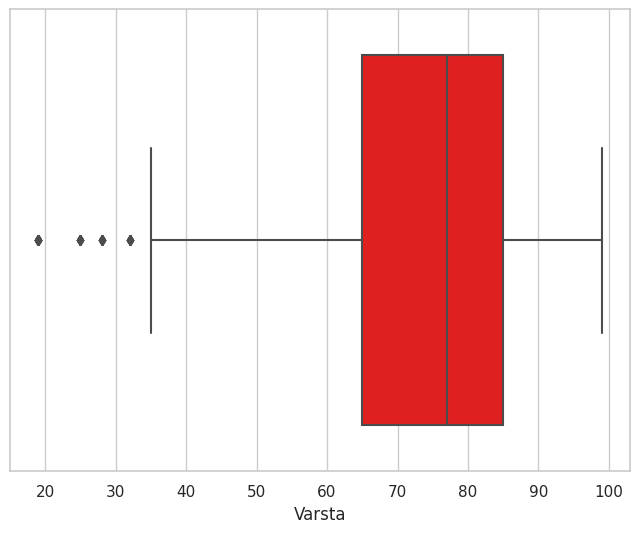

In [117]:
# Definim paleta de culori personalizată
colors = ['red']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Varsta', palette=colors)
plt.show()

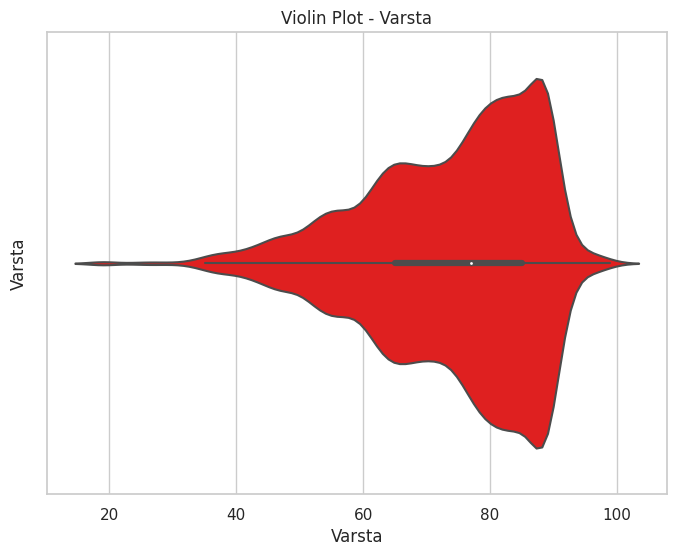

In [118]:
# Definim paleta de culori personalizată
colors = ['red']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Varsta', palette=colors)

plt.ylabel('Varsta')
plt.title('Violin Plot - Varsta')
plt.show()

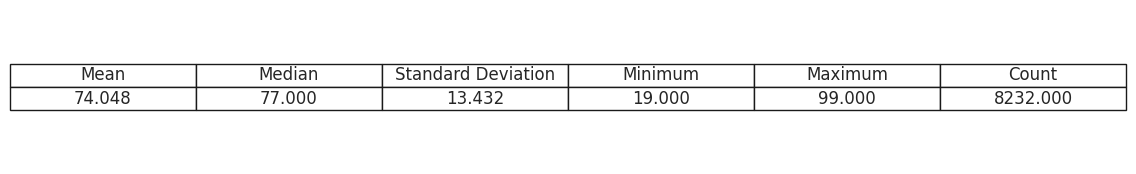

In [129]:

# Definim variabila de interes
variabila = data_as_csv['Varsta']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Indice_de_masa_corporala

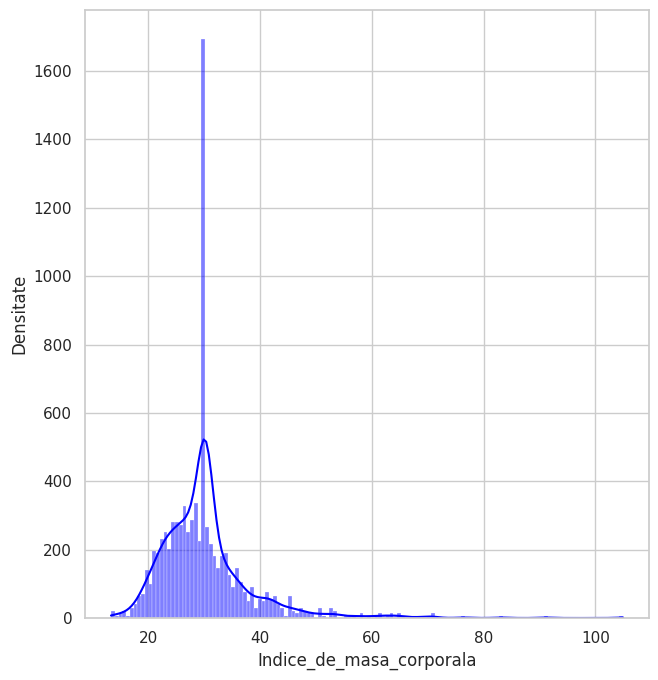

In [130]:
cat_cols = ['Indice_de_masa_corporala']
cat_colour = 'blue'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

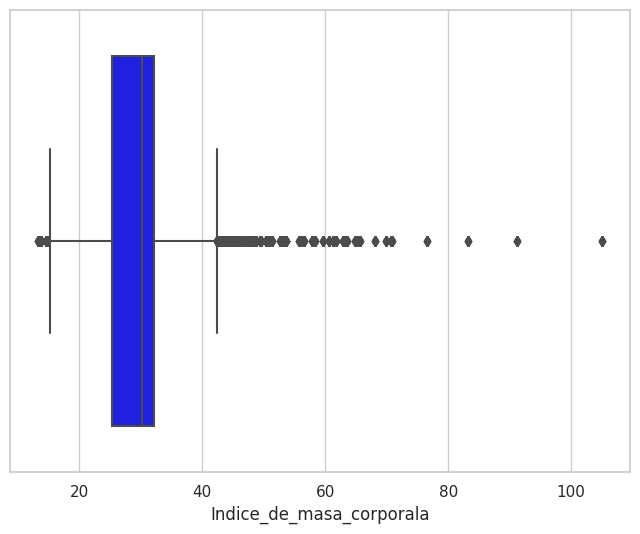

In [131]:
# Definim paleta de culori personalizată
colors = ['blue']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Indice_de_masa_corporala', palette=colors)
plt.show()

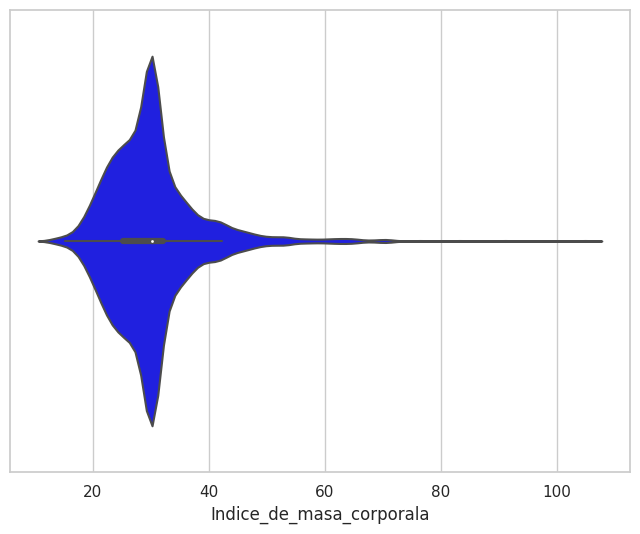

In [133]:
# Definim paleta de culori personalizată
colors = ['blue']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Indice_de_masa_corporala', palette=colors)
plt.show()

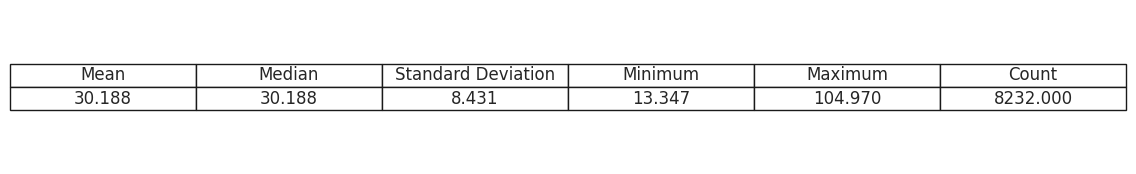

In [134]:
# Definim variabila de interes
variabila = data_as_csv['Indice_de_masa_corporala']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Frecventa_cardiaca

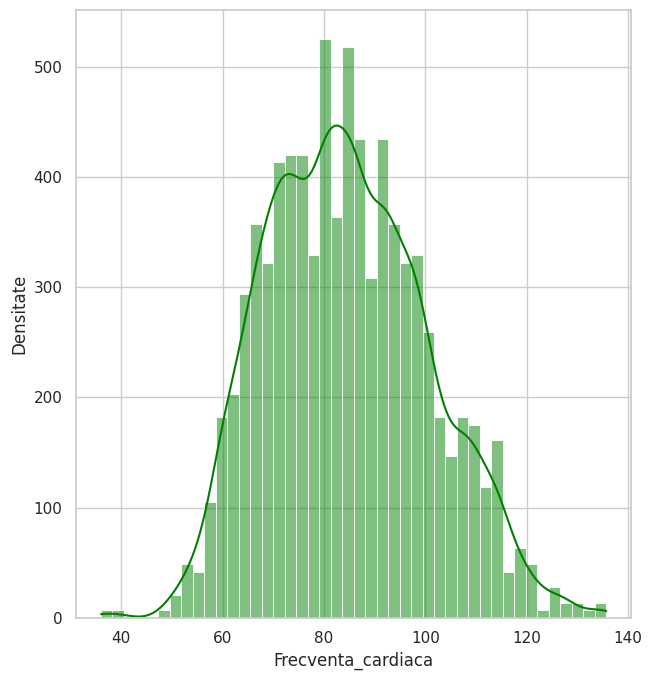

In [135]:
cat_cols = ['Frecventa_cardiaca']
cat_colour = 'green'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

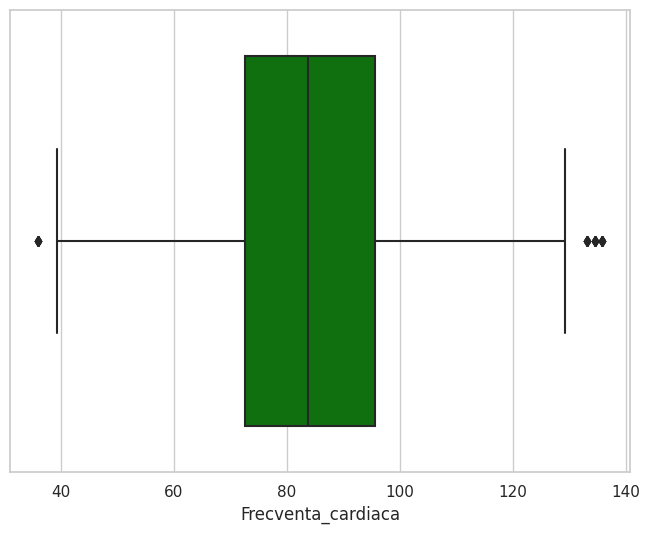

In [136]:
# Definim paleta de culori personalizată
colors = ['green']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Frecventa_cardiaca', palette=colors)
plt.show()

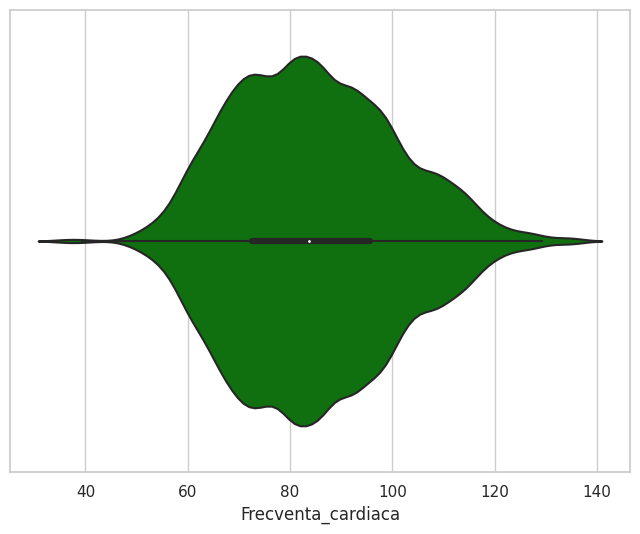

In [137]:
# Definim paleta de culori personalizată
colors = ['green']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Frecventa_cardiaca', palette=colors)
plt.show()

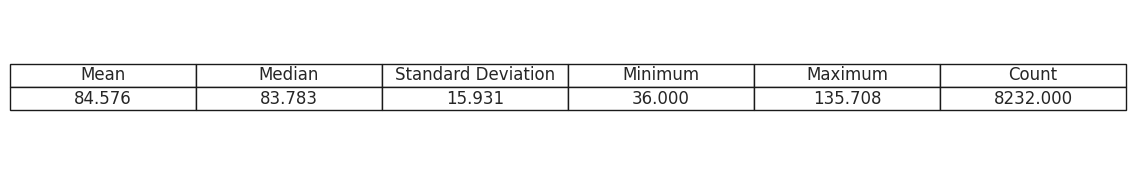

In [138]:
# Definim variabila de interes
variabila = data_as_csv['Frecventa_cardiaca']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Tensiune_arteriala_sistolica

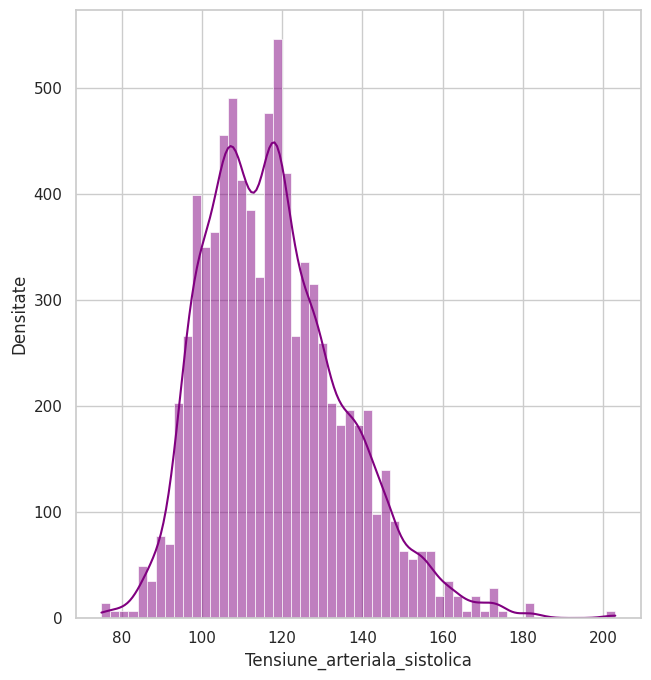

In [144]:
cat_cols = ['Tensiune_arteriala_sistolica']
cat_colour = 'purple'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

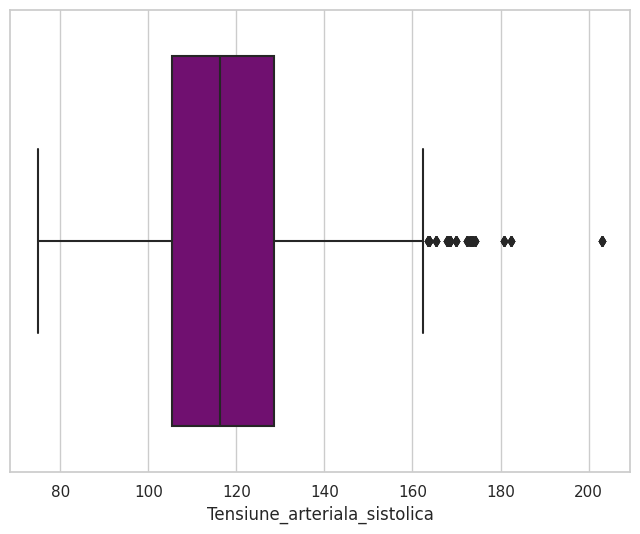

In [145]:
# Definim paleta de culori personalizată
colors = ['purple']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Tensiune_arteriala_sistolica', palette=colors)
plt.show()

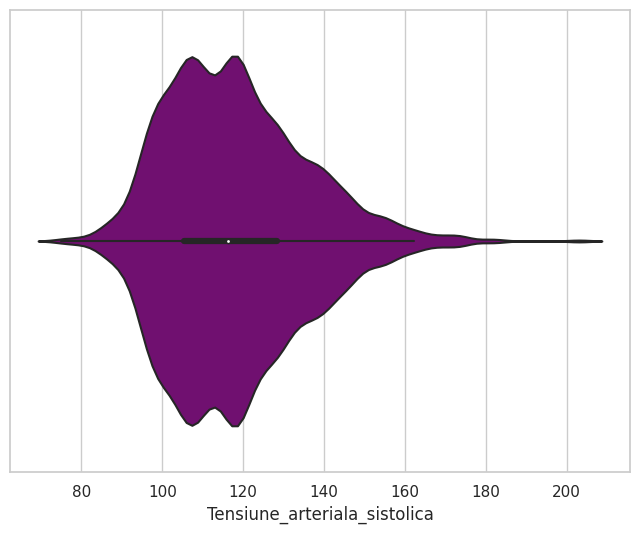

In [146]:
# Definim paleta de culori personalizată
colors = ['purple']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Tensiune_arteriala_sistolica', palette=colors)
plt.show()

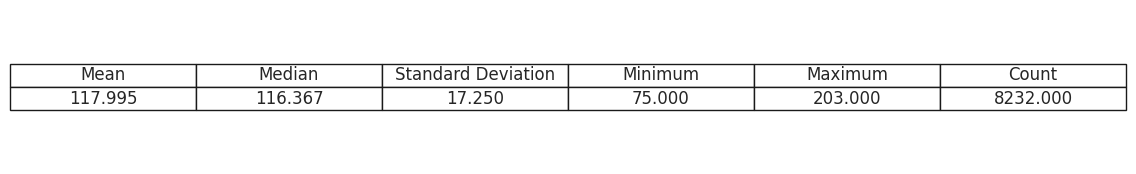

In [147]:
# Definim variabila de interes
variabila = data_as_csv['Tensiune_arteriala_sistolica']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Frecventa_respiratorie

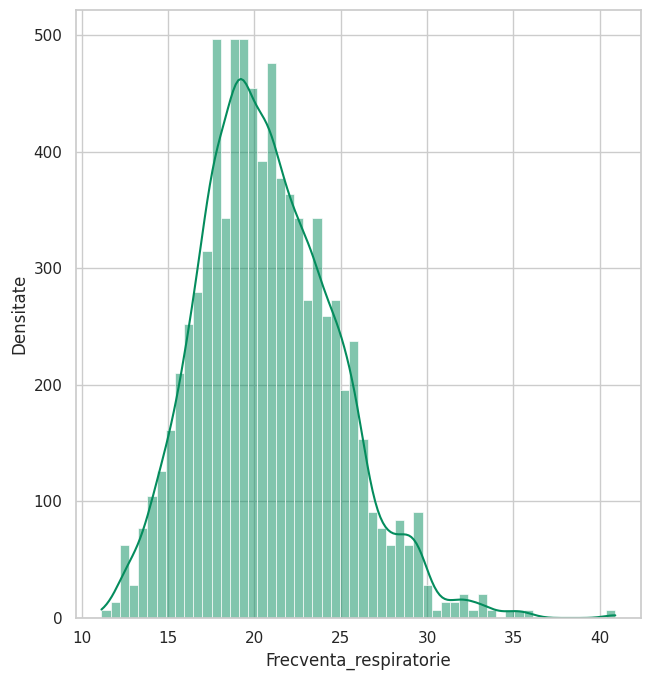

In [153]:
cat_cols = ['Frecventa_respiratorie']
cat_colour = '#048c5d'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

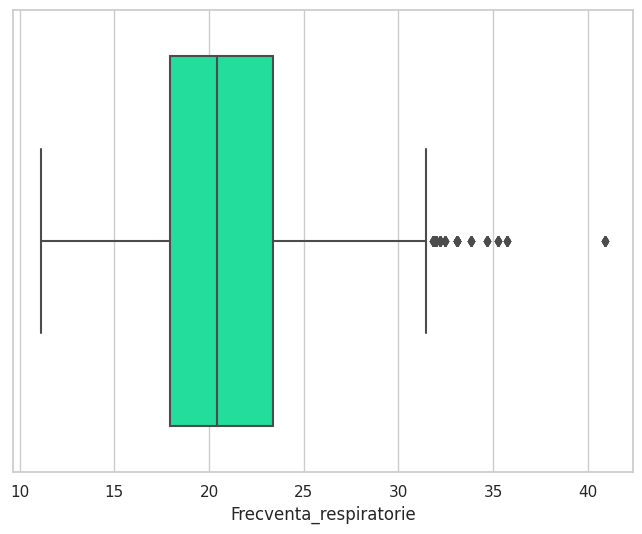

In [149]:
# Definim paleta de culori personalizată
colors = ['#03fca5']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Frecventa_respiratorie', palette=colors)
plt.show()

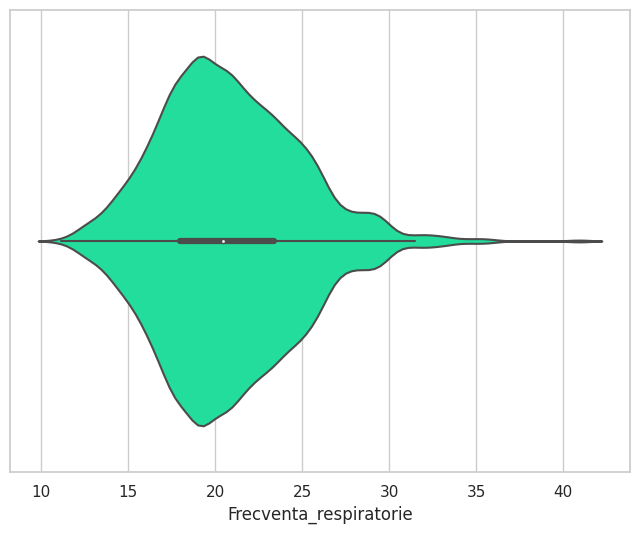

In [150]:
# Definim paleta de culori personalizată
colors = ['#03fca5']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Frecventa_respiratorie', palette=colors)
plt.show()

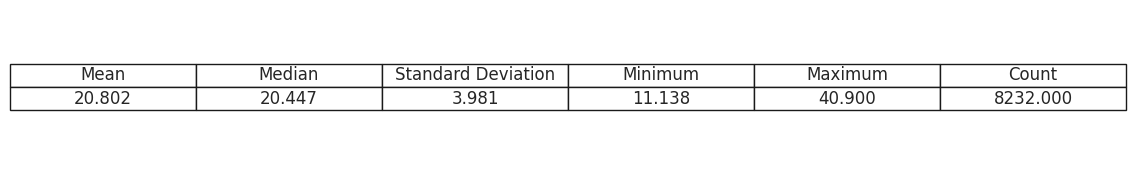

In [151]:
# Definim variabila de interes
variabila = data_as_csv['Frecventa_respiratorie']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Tensiune_arteriala_diastolica

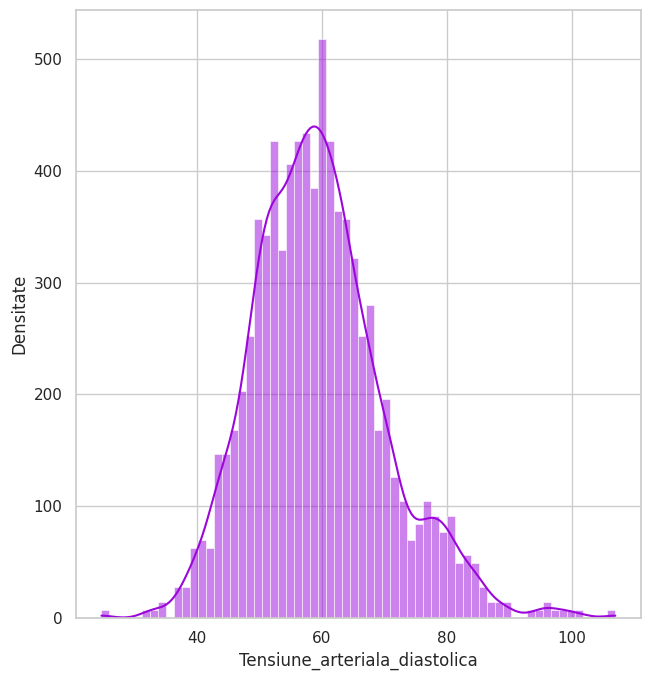

In [155]:
cat_cols = ['Tensiune_arteriala_diastolica']
cat_colour = '#9b07db'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

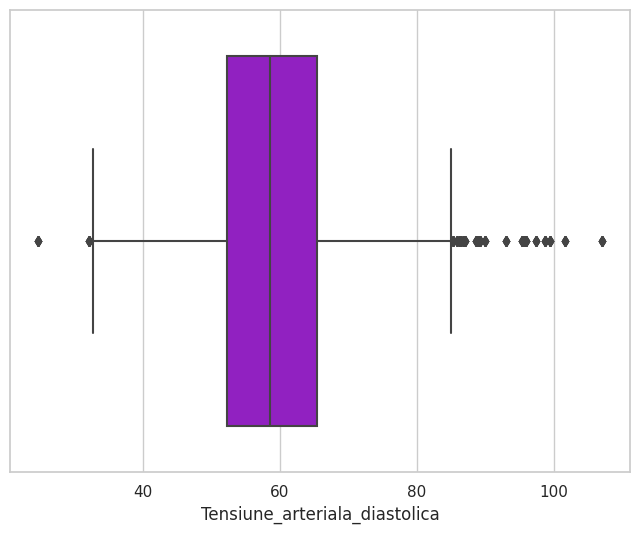

In [156]:
# Definim paleta de culori personalizată
colors = ['#9b07db']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Tensiune_arteriala_diastolica', palette=colors)
plt.show()

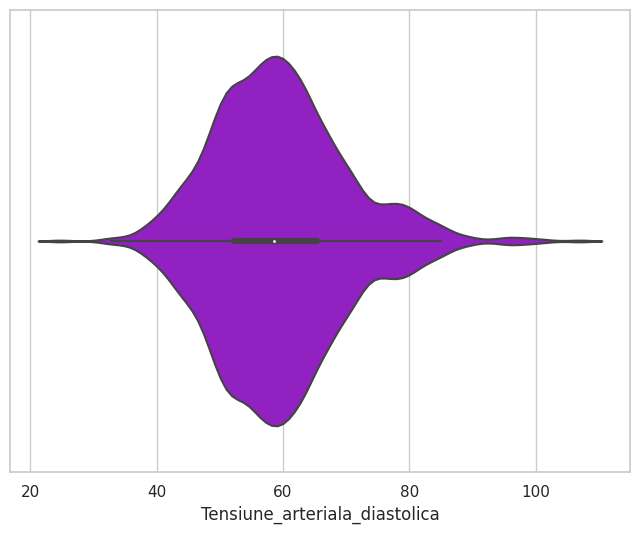

In [157]:
# Definim paleta de culori personalizată
colors = ['#9b07db']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Tensiune_arteriala_diastolica', palette=colors)
plt.show()

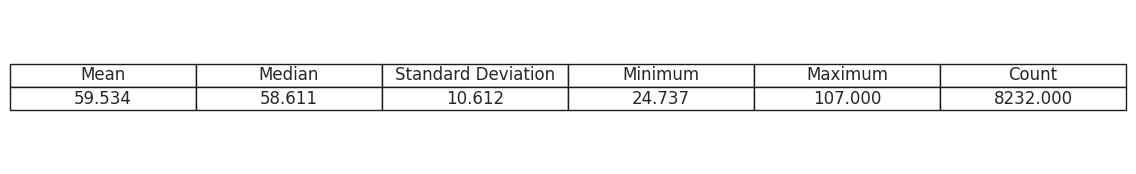

In [158]:
# Definim variabila de interes
variabila = data_as_csv['Tensiune_arteriala_diastolica']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Temperatura

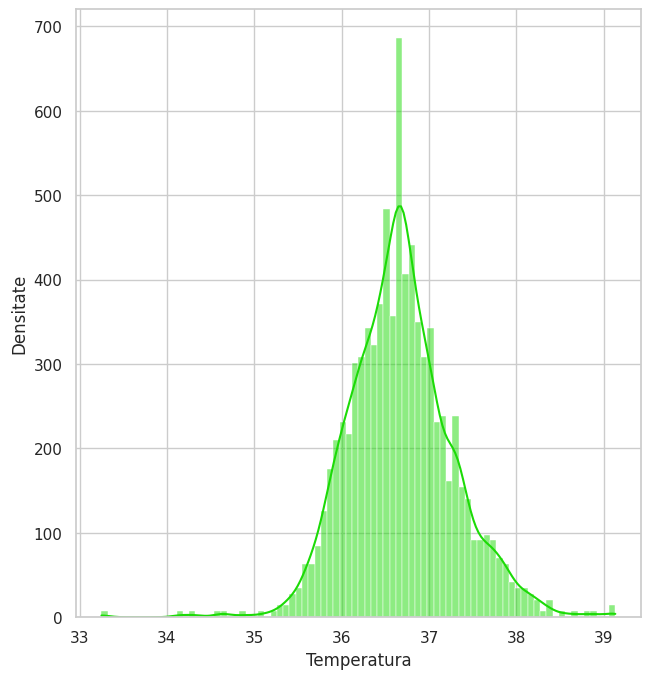

In [161]:
cat_cols = ['Temperatura']
cat_colour = '#1cdb07'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

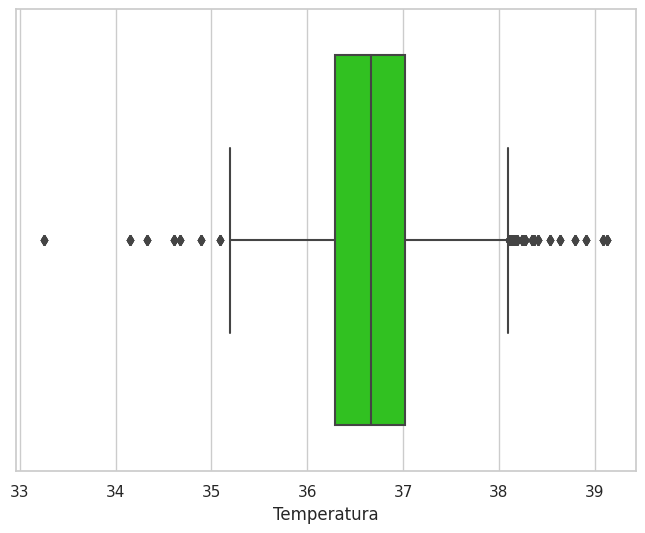

In [162]:
# Definim paleta de culori personalizată
colors = ['#1cdb07']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Temperatura', palette=colors)
plt.show()

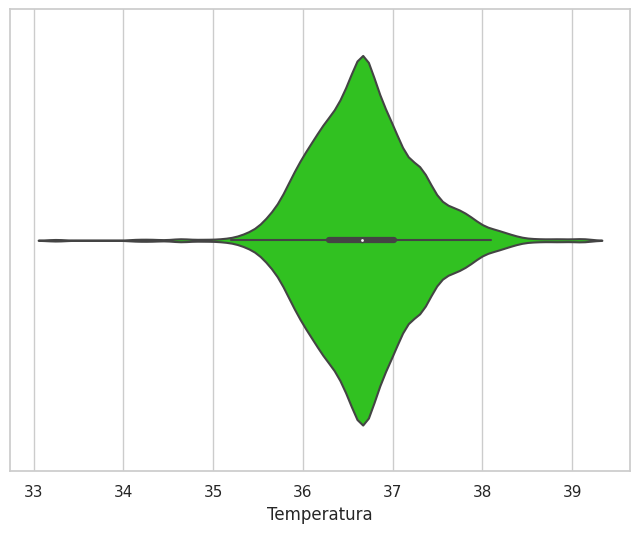

In [163]:
# Definim paleta de culori personalizată
colors = ['#1cdb07']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Temperatura', palette=colors)
plt.show()

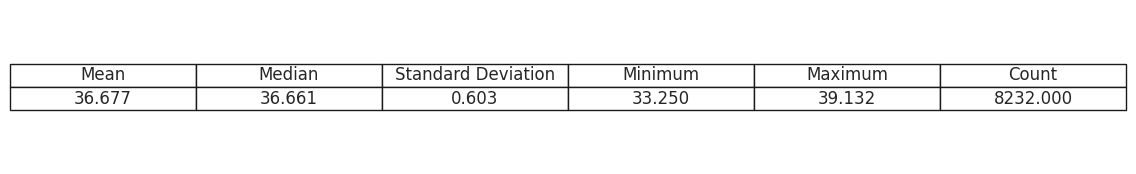

In [164]:
# Definim variabila de interes
variabila = data_as_csv['Temperatura']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Globule_rosii

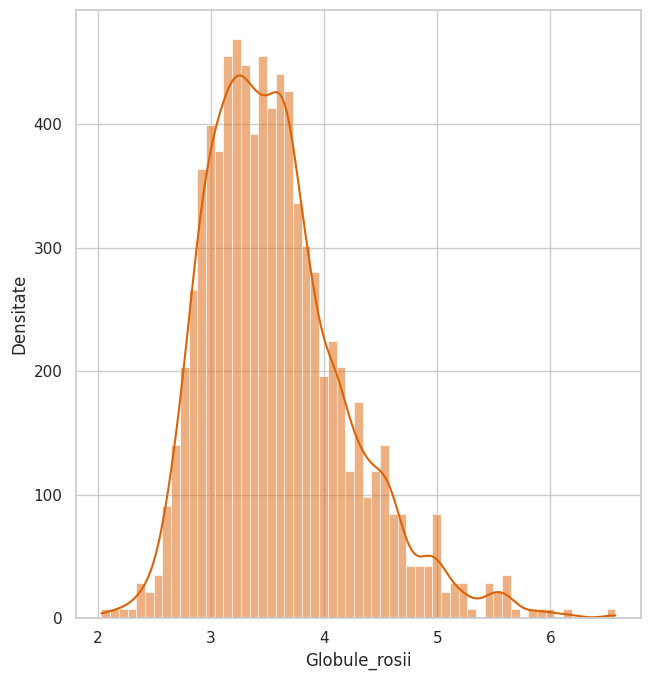

In [165]:
cat_cols = ['Globule_rosii']
cat_colour = '#db6307'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

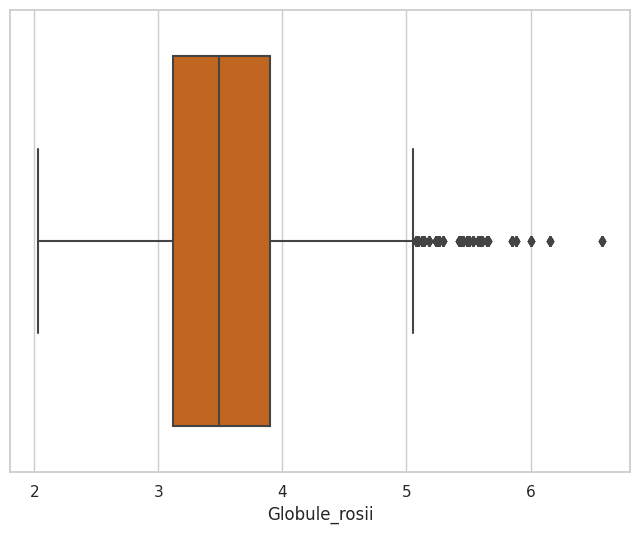

In [166]:
# Definim paleta de culori personalizată
colors = ['#db6307']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Globule_rosii', palette=colors)
plt.show()

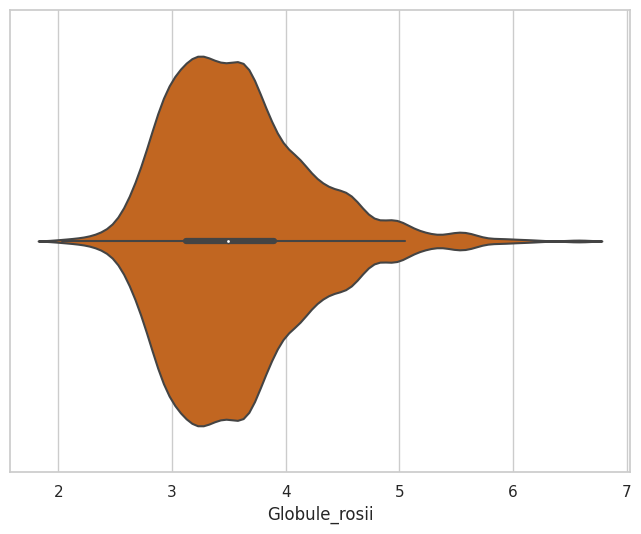

In [171]:
# Definim paleta de culori personalizată
colors = ['#db6307']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Globule_rosii', palette=colors)
plt.show()

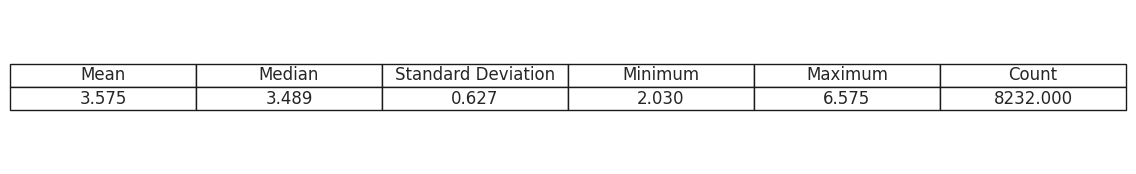

In [172]:
# Definim variabila de interes
variabila = data_as_csv['Globule_rosii']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Hemoglobina_corpusculara_medie

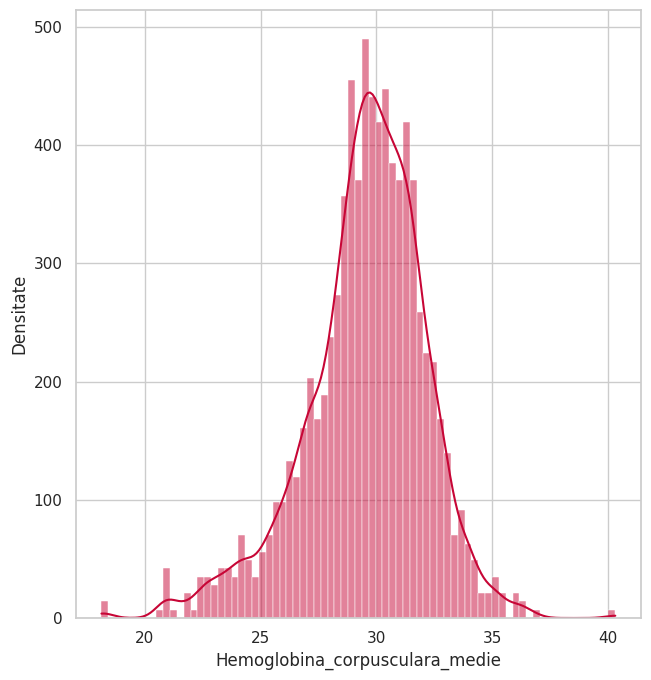

In [173]:
cat_cols = ['Hemoglobina_corpusculara_medie']
cat_colour = '#c70636'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

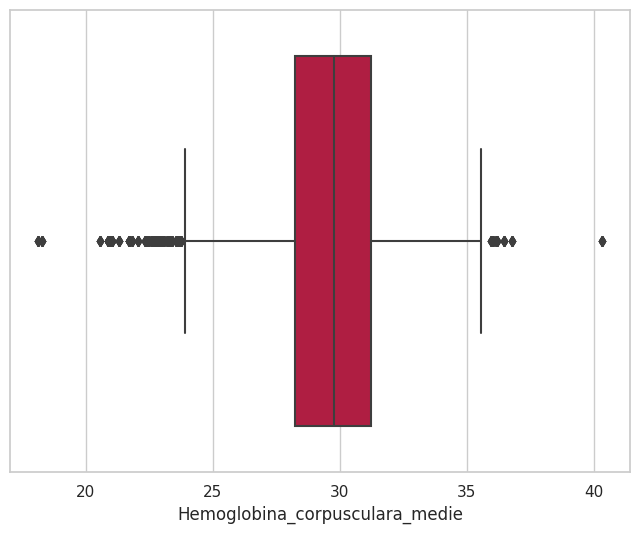

In [174]:
# Definim paleta de culori personalizată
colors = ['#c70636']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Hemoglobina_corpusculara_medie', palette=colors)
plt.show()

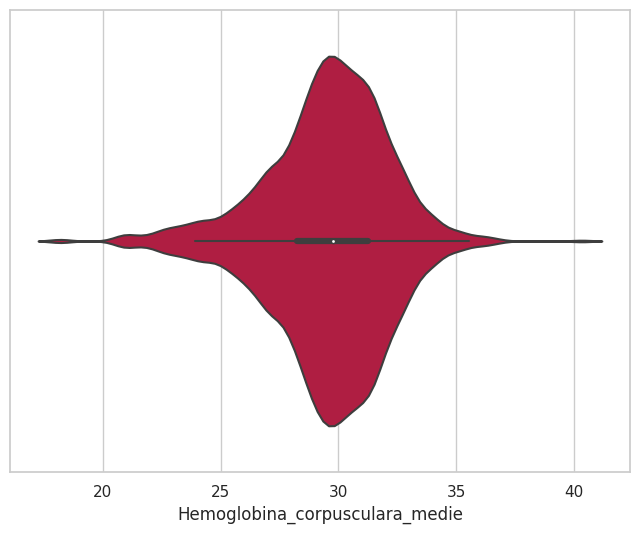

In [175]:
# Definim paleta de culori personalizată
colors = ['#c70636']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Hemoglobina_corpusculara_medie', palette=colors)
plt.show()

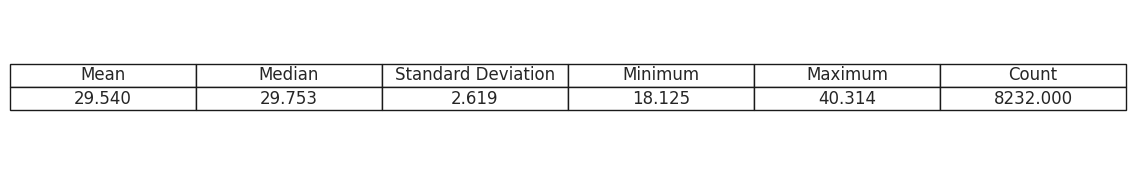

In [176]:
# Definim variabila de interes
variabila = data_as_csv['Hemoglobina_corpusculara_medie']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()

## Glucoza

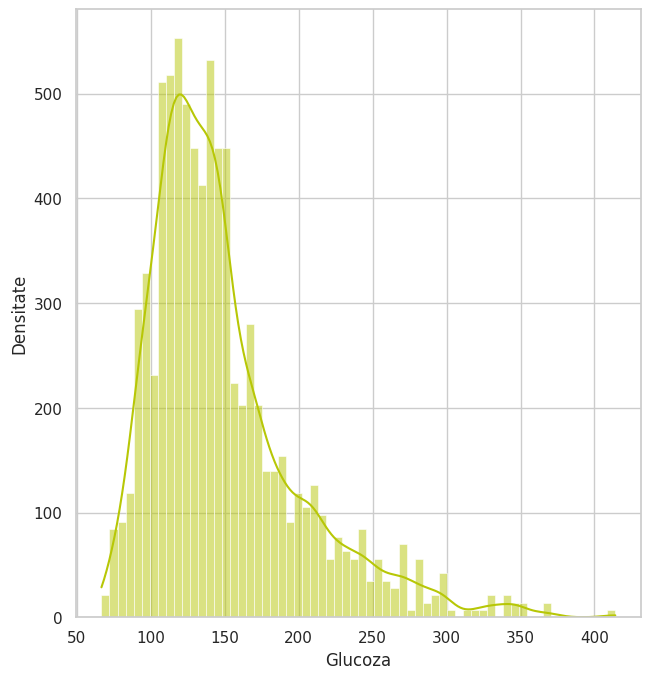

In [177]:
cat_cols = ['Glucoza']
cat_colour = '#b7c706'
num_data = data_as_csv
plt.figure(figsize=(30, 20))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 2:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(num_data[column], color=cat_colour,kde=True)
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.ylabel('Densitate')
plt.show()

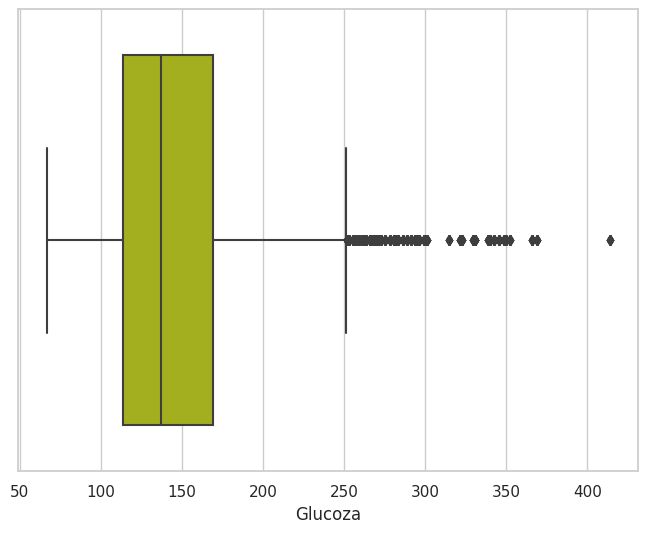

In [178]:
# Definim paleta de culori personalizată
colors = ['#b7c706']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid
# Creăm box plot-ul cu paleta de culori personalizată
sns.boxplot(data=data_as_csv, x='Glucoza', palette=colors)
plt.show()

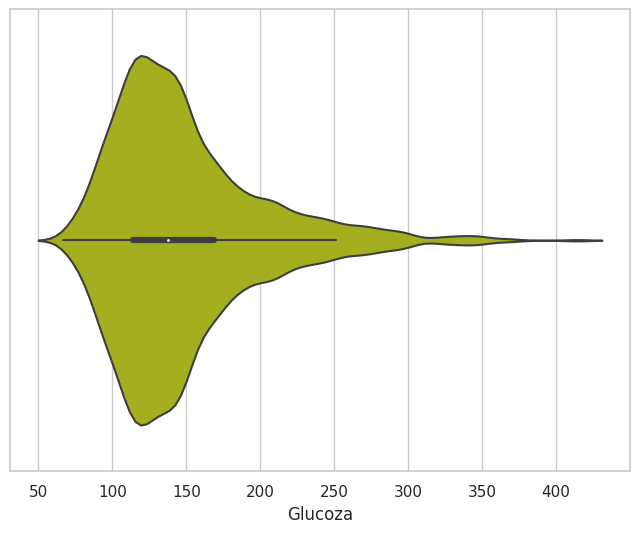

In [179]:
# Definim paleta de culori personalizată
colors = ['#b7c706']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Adăugăm grid

# Creăm violin plot-ul cu paleta de culori personalizată
sns.violinplot(data=data_as_csv, x='Glucoza', palette=colors)
plt.show()

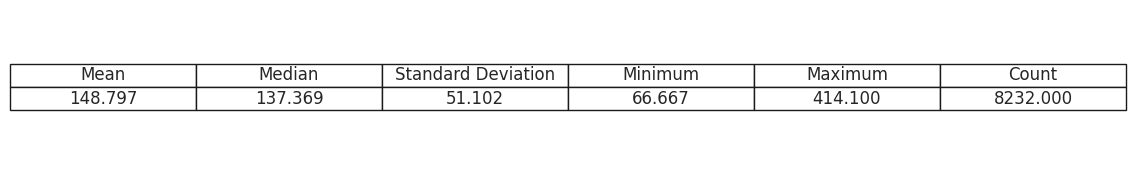

In [180]:
# Definim variabila de interes
variabila = data_as_csv['Glucoza']
# Calculăm statisticile
statistics = {
    'Mean': variabila.mean(),
    'Median': variabila.median(),
    'Standard Deviation': variabila.std(),
    'Minimum': variabila.min(),
    'Maximum': variabila.max(),
    'Count': variabila.count()}
# Convertim statisticile într-un DataFrame
statistics_df = pd.DataFrame.from_dict(statistics, orient='index', columns=['Value'])
# Formatare valorile numerice cu maxim 3 zecimale
statistics_df['Value'] = statistics_df['Value'].apply(lambda x: '{:.3f}'.format(x))
# Creăm un DataFrame cu două linii
table_df = pd.DataFrame([statistics_df['Value'].values], columns=statistics_df.index)
# Creăm un subplot pentru a afișa tabelul ca imagine
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')  # Dezactivăm afișarea axelor
# Afișăm tabelul ca o tabelă în subplot
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
# Setăm stilurile pentru tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Mărim tabelul
# Ajustăm dimensiunea celulelor pentru a încăpea valorile
cell_dict = table.get_celld()
for key in cell_dict:
    cell_dict[key].set_text_props(fontsize=12)
    cell_dict[key].set_height(0.15)
    cell_dict[key].set_width(0.3)
plt.show()